In [579]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler #No normales con outlier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import matplotlib.image as mpimg
from sklearn.model_selection import cross_val_score

In [445]:
Precio_alquiler= pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Precio_anual.csv')
Precio_alquiler

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2023               1  Ciutat Vella           1   
1   2023               1  Ciutat Vella           2   
2   2023               1  Ciutat Vella           3   
3   2023               1  Ciutat Vella           4   
4   2023               2      Eixample           5   
..   ...             ...           ...         ...   
68  2023              10    Sant Martí          69   
69  2023              10    Sant Martí          70   
70  2023              10    Sant Martí          71   
71  2023              10    Sant Martí          72   
72  2023              10    Sant Martí          73   

                                       Nom_Barri  \
0                                       el Raval   
1                                 el Barri Gòtic   
2                                 la Barceloneta   
3          Sant Pere, Santa Caterina i la Ribera   
4                                  el Fort Pienc   
..                                           ...   
68  Diagonal Mar i el Front Marítim del Poblenou   
69                         el Besòs i el Maresme   
70                       Provençals del Poblenou   
71                      Sant Martí de Provençals   
72                           la Verneda i la Pau   

                        Lloguer_mitja  Precio anual  
0   Lloguer mitjà mensual (Euros/mes)        926.10  
1   Lloguer mitjà mensual (Euros/mes)       1286.70  
2   Lloguer mitjà mensual (Euros/mes)        990.45  
3   Lloguer mitjà mensual (Euros/mes)       1086.65  
4   Lloguer mitjà mensual (Euros/mes)       1170.60  
..                                ...           ...  
68  Lloguer mitjà mensual (Euros/mes)       1444.35  
69  Lloguer mitjà mensual (Euros/mes)        777.25  
70  Lloguer mitjà mensual (Euros/mes)       1187.35  
71  Lloguer mitjà mensual (Euros/mes)        943.10  
72  Lloguer mitjà mensual (Euros/mes)       1069.75  

[73 rows x 7 columns]

In [446]:
Cultural_ocio= pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Cultural_ocio.csv')

In [447]:
Autobuses= pd.read_csv(r'C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Autobuses.csv')

In [448]:
Aparcamientos= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Aparcamiento.csv")

In [449]:
Seguridad= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Seguridad.csv")

In [450]:
Edad_media_edifi= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Edad_media_edifi.csv")

In [451]:
Equip_sanitario= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Equip_sanitario.csv")

In [452]:
Instalaciones_deportivas= pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\PROYECTO FINAL\Dataset finales\Dataframe transformados\Instalaciones_deportivas.csv")

In [453]:
Alquiler_data = pd.merge(Precio_alquiler, Cultural_ocio, on="Codi_Barri", how='left')

In [454]:
Alquiler_data = pd.merge(Alquiler_data, Autobuses, on="Codi_Barri", how='left')

In [455]:
Alquiler_data = pd.merge(Alquiler_data, Aparcamientos, on="Codi_Barri", how='left')

In [456]:
Alquiler_data = pd.merge(Alquiler_data, Seguridad, on="Codi_Barri", how='left')

In [457]:
Alquiler_data = pd.merge(Alquiler_data, Equip_sanitario, on="Codi_Barri", how='left')

In [458]:
Alquiler_data = pd.merge(Alquiler_data, Edad_media_edifi, on="Codi_Barri", how='left')

In [459]:
Alquiler_data = pd.merge(Alquiler_data, Instalaciones_deportivas, on="Codi_Barri", how='left')

In [460]:
Alquiler_data
pd.set_option('display.max_columns', 500)

In [461]:
Alquiler_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Any                                       73 non-null     int64  
 1   Codi_Districte                            73 non-null     int64  
 2   Nom_Districte                             73 non-null     object 
 3   Codi_Barri                                73 non-null     int64  
 4   Nom_Barri                                 73 non-null     object 
 5   Lloguer_mitja                             73 non-null     object 
 6   Precio anual                              73 non-null     float64
 7   Centres cívics                            73 non-null     int64  
 8   Interiors d'illa                          73 non-null     int64  
 9   Museos                                    73 non-null     int64  
 10  Ocio nocturno                           

In [462]:
Alquiler_data[Alquiler_data.duplicated()]

Empty DataFrame
Columns: [Any, Codi_Districte, Nom_Districte, Codi_Barri, Nom_Barri, Lloguer_mitja, Precio anual, Centres cívics, Interiors d'illa, Museos, Ocio nocturno, Parcs i jardins, Restaurants, Universitats, Zoo, Autobus dia, Autobus noche, Aparcamientos, Aparcamientos con plazas para bicicletas, Camaras_seguridad, Hospitals, Edad_Barri, Installacions esportives]
Index: []

In [463]:
Alquiler_data[Alquiler_data.isnull().any(axis=1)]

Any  Codi_Districte        Nom_Districte  Codi_Barri  \
3   2023               1         Ciutat Vella           4   
11  2023               3       Sants-Montjuïc          12   
13  2023               3       Sants-Montjuïc          14   
14  2023               3       Sants-Montjuïc          15   
16  2023               3       Sants-Montjuïc          17   
20  2023               4            Les Corts          21   
21  2023               5  Sarrià-Sant Gervasi          22   
28  2023               6               Gràcia          29   
31  2023               6               Gràcia          32   
33  2023               7       Horta-Guinardó          34   
35  2023               7       Horta-Guinardó          36   
36  2023               7       Horta-Guinardó          37   
37  2023               7       Horta-Guinardó          38   
38  2023               7       Horta-Guinardó          39   
39  2023               7       Horta-Guinardó          40   
40  2023               7       Horta-Guinardó          41   
41  2023               7       Horta-Guinardó          42   
44  2023               8           Nou Barris          45   
45  2023               8           Nou Barris          46   
46  2023               8           Nou Barris          47   
47  2023               8           Nou Barris          48   
48  2023               8           Nou Barris          49   
49  2023               8           Nou Barris          50   
50  2023               8           Nou Barris          51   
52  2023               8           Nou Barris          53   
53  2023               8           Nou Barris          54   
54  2023               8           Nou Barris          55   
55  2023               8           Nou Barris          56   
56  2023               9          Sant Andreu          57   
57  2023               9          Sant Andreu          58   
58  2023               9          Sant Andreu          59   
61  2023               9          Sant Andreu          62   
62  2023               9          Sant Andreu          63   
63  2023              10           Sant Martí          64   
65  2023              10           Sant Martí          66   
69  2023              10           Sant Martí          70   
71  2023              10           Sant Martí          72   
72  2023              10           Sant Martí          73   

                                Nom_Barri                      Lloguer_mitja  \
3   Sant Pere, Santa Caterina i la Ribera  Lloguer mitjà mensual (Euros/mes)   
11             la Marina del Prat Vermell  Lloguer mitjà mensual (Euros/mes)   
13                  la Font de la Guatlla  Lloguer mitjà mensual (Euros/mes)   
14                            Hostafrancs  Lloguer mitjà mensual (Euros/mes)   
16                          Sants - Badal  Lloguer mitjà mensual (Euros/mes)   
20                              Pedralbes  Lloguer mitjà mensual (Euros/mes)   
21  Vallvidrera, el Tibidabo i les Planes  Lloguer mitjà mensual (Euros/mes)   
28                                el Coll  Lloguer mitjà mensual (Euros/mes)   
31     el Camp d'en Grassot i Gràcia Nova  Lloguer mitjà mensual (Euros/mes)   
33                               Can Baró  Lloguer mitjà mensual (Euros/mes)   
35                   la Font d'en Fargues  Lloguer mitjà mensual (Euros/mes)   
36                              el Carmel  Lloguer mitjà mensual (Euros/mes)   
37                           la Teixonera  Lloguer mitjà mensual (Euros/mes)   
38               Sant Genís dels Agudells  Lloguer mitjà mensual (Euros/mes)   
39                                Montbau  Lloguer mitjà mensual (Euros/mes)   
40                       la Vall d'Hebron  Lloguer mitjà mensual (Euros/mes)   
41                               la Clota  Lloguer mitjà mensual (Euros/mes)   
44                                  Porta  Lloguer mitjà mensual (Euros/mes)   
45                    el Turó de la Peira  Lloguer mitjà mensual (Euros/mes)   
46                       

In [464]:
Alquiler_data.fillna(0, inplace=True)

In [465]:
Alquiler_data.head(73)

Any  Codi_Districte Nom_Districte  Codi_Barri  \
0   2023               1  Ciutat Vella           1   
1   2023               1  Ciutat Vella           2   
2   2023               1  Ciutat Vella           3   
3   2023               1  Ciutat Vella           4   
4   2023               2      Eixample           5   
..   ...             ...           ...         ...   
68  2023              10    Sant Martí          69   
69  2023              10    Sant Martí          70   
70  2023              10    Sant Martí          71   
71  2023              10    Sant Martí          72   
72  2023              10    Sant Martí          73   

                                       Nom_Barri  \
0                                       el Raval   
1                                 el Barri Gòtic   
2                                 la Barceloneta   
3          Sant Pere, Santa Caterina i la Ribera   
4                                  el Fort Pienc   
..                                           ...   
68  Diagonal Mar i el Front Marítim del Poblenou   
69                         el Besòs i el Maresme   
70                       Provençals del Poblenou   
71                      Sant Martí de Provençals   
72                           la Verneda i la Pau   

                        Lloguer_mitja  Precio anual  Centres cívics  \
0   Lloguer mitjà mensual (Euros/mes)        926.10              43   
1   Lloguer mitjà mensual (Euros/mes)       1286.70              24   
2   Lloguer mitjà mensual (Euros/mes)        990.45              17   
3   Lloguer mitjà mensual (Euros/mes)       1086.65              28   
4   Lloguer mitjà mensual (Euros/mes)       1170.60              14   
..                                ...           ...             ...   
68  Lloguer mitjà mensual (Euros/mes)       1444.35               3   
69  Lloguer mitjà mensual (Euros/mes)        777.25               9   
70  Lloguer mitjà mensual (Euros/mes)       1187.35               3   
71  Lloguer mitjà mensual (Euros/mes)        943.10              11   
72  Lloguer mitjà mensual (Euros/mes)       1069.75               9   

    Interiors d'illa  Museos  Ocio nocturno  Parcs i jardins  Restaurants  \
0                  1       5             59               25            4   
1                  0      14             46               14            5   
2                  0       1             18               10            8   
3                  0      10            174               38            5   
4                  6       2              4               28            3   
..               ...     ...            ...              ...          ...   
68                 0       0              0               31            0   
69                 0       2              0               42            0   
70                 0       2              0               26            0   
71                 0       0              0               27            0   
72                 0       0              0               46            0   

    Universitats  Zoo  Autobus dia  Autobus noche  Aparcamientos  \
0              0    0           32             11           25.0   
1              0    0           22             16           16.0   
2              0    0           33             15            7.0   
3              0    1           25             16           11.0   
4              0    0           21             18           20.0   
..           ...  ...          ...            ...            ...   
68             0    0           26             18            2.0   
69             0    0           28             14            0.0   
70             0    0           25             18            1.0   
71             0    0           14              9            0.0   
72             0    0           29              8            2.0   

    Aparcamientos con plazas para bicicletas  Camaras_seguridad  Hospitals  \
0                                        4.0              

In [466]:
Alquiler_data[Alquiler_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Any, Codi_Districte, Nom_Districte, Codi_Barri, Nom_Barri, Lloguer_mitja, Precio anual, Centres cívics, Interiors d'illa, Museos, Ocio nocturno, Parcs i jardins, Restaurants, Universitats, Zoo, Autobus dia, Autobus noche, Aparcamientos, Aparcamientos con plazas para bicicletas, Camaras_seguridad, Hospitals, Edad_Barri, Installacions esportives]
Index: []

In [467]:
conversion_dict = {col: int for col in Alquiler_data.columns if col != 'Precio anual'}
Alquiler_data = Alquiler_data.astype(conversion_dict, errors='ignore')

In [468]:
Alquiler_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 23 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Any                                       73 non-null     int32  
 1   Codi_Districte                            73 non-null     int32  
 2   Nom_Districte                             73 non-null     object 
 3   Codi_Barri                                73 non-null     int32  
 4   Nom_Barri                                 73 non-null     object 
 5   Lloguer_mitja                             73 non-null     object 
 6   Precio anual                              73 non-null     float64
 7   Centres cívics                            73 non-null     int32  
 8   Interiors d'illa                          73 non-null     int32  
 9   Museos                                    73 non-null     int32  
 10  Ocio nocturno                           

1. Titulo: Barcelona Datos de Alquiler

2. Fuentes:
   (a) Origen:  Todos los datos fueron extraidos de la pagina oficial del gobierno de Cataluña "OPEN DATA". Este dataset es una recopilacion de diferentes datasets, que fueron procesados y unificados un solo dataset.
   (b) Creador:  Reinel Mendez Reina 
   (c) Fecha: 18 Marzo, 2024

3. Past Usage:
   

4. Información Relevante:

   En que barrio es mejor vivir dependiendo de las necesidades de cada persona.

5. Numero de registros: 73

6. Numero de variables: 28 Variables.

7. Información de Variables:

   - Any: Año 2023
   - Codi_Districte: Codigo designado para cada distrito ( cada distrito esta ocnformado por barrios).	
   - Nom_Districte: Nombre de cada distrito
   - Codi_Barri: Codigo designado para cada barrio (el conjunto de barrios conforman los distritos).
   - Nom_Barri: Nombre del barrio	
   - Lloguer_mitja:  Alquiler medio mensual (Euros/mes)
   - Precio anual: Precio de Alquiler por año 2023
   - Centres cívics: Equipamientos
   - Installacions esportives	
   - Interiors d'illa 
   - Museos	
   - Ocio nocturno	
   - Parcs i jardins	
   - Restaurants	
   - Universitats	
   - Zoo	
   - Autobus dia	
   - Autobus noche	
   - Aparcamientos	
   - Aparcamientos con plazas para bicicletas		
   - Camaras_seguridad		
   - Hospitals	
   - Edad_Barri: Edad del barrio. 

8. Valores de variables faltantes:  None.

In [469]:
Alquiler_data.Any.unique()

array([2023])

In [470]:
Alquiler_data.Codi_Districte.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [471]:
Alquiler_data.Nom_Districte.unique()

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

In [472]:
Alquiler_data.Codi_Barri.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [473]:
Alquiler_data.Nom_Barri.unique()

array(['el Raval', 'el Barri Gòtic', 'la Barceloneta',
       'Sant Pere, Santa Caterina i la Ribera', 'el Fort Pienc',
       'la Sagrada Família', "la Dreta de l'Eixample",
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sant Antoni', 'el Poble Sec',
       'la Marina del Prat Vermell', 'la Marina de Port',
       'la Font de la Guatlla', 'Hostafrancs', 'la Bordeta',
       'Sants - Badal', 'Sants', 'les Corts',
       'la Maternitat i Sant Ramon', 'Pedralbes',
       'Vallvidrera, el Tibidabo i les Planes', 'Sarrià',
       'les Tres Torres', 'Sant Gervasi - la Bonanova',
       'Sant Gervasi - Galvany', 'el Putxet i el Farró',
       'Vallcarca i els Penitents', 'el Coll', 'la Salut',
       'la Vila de Gràcia', "el Camp d'en Grassot i Gràcia Nova",
       'el Baix Guinardó', 'Can Baró', 'el Guinardó',
       "la Font d'en Fargues", 'el Carmel', 'la Teixonera',
       'Sant Genís dels Agudells', 'Montbau', "la Vall d'Hebron",
       'la Clota', '

In [474]:
Alquiler_data.duplicated().sum()

0

### ANALISIS ESTADISTICO 

In [475]:
Alquiler_data.describe().round(0)

Any  Codi_Districte  Codi_Barri  Precio anual  Centres cívics  \
count    73.0            73.0        73.0          73.0            73.0   
mean   2023.0             6.0        37.0        1024.0             9.0   
std       0.0             3.0        21.0         273.0             8.0   
min    2023.0             1.0         1.0         492.0             1.0   
25%    2023.0             4.0        19.0         857.0             4.0   
50%    2023.0             7.0        37.0         951.0             7.0   
75%    2023.0             8.0        55.0        1132.0            11.0   
max    2023.0            10.0        73.0        1815.0            43.0   

       Interiors d'illa  Museos  Ocio nocturno  Parcs i jardins  Restaurants  \
count              73.0    73.0           73.0             73.0         73.0   
mean                1.0     1.0            9.0             19.0          1.0   
std                 2.0     3.0           25.0             12.0          2.0   
min                 0.0     0.0            0.0              1.0          0.0   
25%                 0.0     0.0            0.0             10.0          0.0   
50%                 0.0     0.0            0.0             18.0          0.0   
75%                 0.0     2.0            5.0             25.0          0.0   
max                12.0    14.0          174.0             53.0         11.0   

       Universitats   Zoo  Autobus dia  Autobus noche  Aparcamientos  \
count          73.0  73.0         73.0           73.0           73.0   
mean            0.0   0.0         33.0           11.0            8.0   
std             0.0   0.0         23.0            9.0           11.0   
min             0.0   0.0          3.0            0.0            0.0   
25%             0.0   0.0         18.0            4.0            0.0   
50%             0.0   0.0         26.0           10.0            3.0   
75%             0.0   0.0         42.0           15.0           10.0   
max             1.0   1.0        123.0           51.0           47.0   

       Aparcamientos con plazas para bicicletas  Camaras_seguridad  Hospitals  \
count                                      73.0               73.0       73.0   
mean                                        1.0                2.0        2.0   
std                                         1.0                3.0        2.0   
min                                         0.0                0.0        0.0   
25%                                         0.0                0.0        0.0   
50%                                         0.0                2.0        1.0   
75%                                         1.0                3.0        3.0   
max                                         7.0               16.0        9.0   

       Edad_Barri  Installacions esportives  
count        73.0                      73.0  
mean         63.0                      49.0  
std          17.0                      45.0  
min          31.0                       0.0  
25%          54.0                      17.0  
50%          58.0                      35.0  
75%          66.0                      62.0  
max         129.0                     251.0

Analisis estadistico Inicial. 

- Any: 
- Codi_Districte: 
- Nom_Districte: 
- Codi_Barri: 
- Nom_Barri:
- Lloguer_mitja: 

- Precio anual: Alquiler medio mensual (Euros/mes) es de 1024 Euros para la ciudad de Barcelona. entre los datos hay una desviacion estandar de 273 Euros. el precio minimo de alquiler es de 492 euros. en el 25% de los datos se contabiliza que la media es de 857 euros. En el 50% de los barrios el precio medio de alquileres es de  951 Euros. En el 75% de los barrios el precio medio es de 1132  Euros. En el total de los barrios el precio medio es de 1815 Euros. entonces vemos que el 50% de los barrios tienen un precio medio de alquiler menos a 951 Euros y el otro 50% mayor a 952. El 25% de los barrios tienen una media de alquiler mayor a 1132 Euros y solo un 25% de los barrios tienen una precio medio de alquiler inferior a 857 Euros. 

- Centres cívics: El barrio que mas centros civicos tiene: 43, el que menos centros civicos tiene: 1.: Todos los barrios tiene la menos 1 centro civico.

- Installacions esportives: El barrio que mas centros deportivos tiene: 251, el que menos centros deportivos tiene: 1. hay barrios que no registran aquipamientos deportivos. 

- Interiors d'illa: El barrio que mas interiores de manzana tiene: 12, el que menosinteriores de manzana tiene: 0. hay barrios que no tienen interiores de manzanas.

- Museos: El barrio que mas Museos tiene: 14, el que menos museos tiene: 0, hay barrios que no tienen museos.

- Ocio nocturno: El barrio que mas Ocio nocturno tiene: 174, el que menosinteriores de manzana tiene: 0. hay barrios que no tienen ocio nocturno.

- Parcs i jardins: El barrio que mas parques y jardines tiene: 53, el que menos parques y jardines tiene: 1, todos los barrios tienen al menos 1 parque y jardin.

- Restaurants: El barrio que mas restaurantes tiene: 11, el que menos restaurantes tiene: 0, hay barrios en mi conjunto de datos que no tienen restaurantes.

- Universitats: hay un barrio que tienen 1 univesidad en mi conjunto de datos. 

- Zoo: hay un barrio que tiene 1 zoo en mi conjunot se datos.

- Autobus dia: El barrio que mas Autobus dia tiene: 123, el que menos Autobus dia tiene: 3.

- Autobus noche: El barrio que mas Autobus noche tiene: 51, el que menos Autobus noche tiene: 0.

- Aparcamientos: El barrio que mas Estaciones de Aparcamientos tiene: 47, el que menos Aparcamientos tiene: 0.

- Aparcamientos con plazas para bicicletas: El barrio que mas Estaciones de Aparcamientos con plazas para bicicletas tiene: 7, el que menos  Aparcamientos con plazas para bicicletas tiene: 0.

- Camaras_seguridad:  El barrio que mas Camaras_seguridad tiene: 16, el que menos Camaras_seguridad tiene: 0. hay barrios isn camaras de seguridad. 

- Hospitals: El barrio que mas Hospitals  tiene: 9, el que menos Hospitals tiene: 0.

- Edad_Barri: Edad del barrio: El barrio mas antiguo tiene 129 años, el menos antoguo tiene 31 años.

In [476]:
Alquiler_data.sum()


Any                                                                                    147679
Codi_Districte                                                                            456
Nom_Districte                               Ciutat VellaCiutat VellaCiutat VellaCiutat Vel...
Codi_Barri                                                                               2701
Nom_Barri                                   el Ravalel Barri Gòticla BarcelonetaSant Pere,...
Lloguer_mitja                               Lloguer mitjà mensual (Euros/mes)Lloguer mitjà...
Precio anual                                                                         74779.68
Centres cívics                                                                            643
Interiors d'illa                                                                           49
Museos                                                                                     95
Ocio nocturno                                               

Si vemos el total para Barcelona de cada variable vemos datos totales interesantes como: 
- Centres cívics: 643
- Parcs i jardins: 1398
- Estaciones de autobus: 3
- Aparcamientos:551
- Puntos de recarga electrica: 2
- Camaras_seguridad:165
- CAPs:54
- CUAPs: 12
- Hospitals:70
- Installacions esportives: 3548

Es importante destacar por ejemplo para:

- Universitats: 2
- Restaurants: 59
- Alquiler de vehiculos. 3
- Aparcamientos: 551
- Aparcamientos con plazas para bicicletas: 62
- Puntos de recarga electrica: 2

son variables que estan en constante cambio en la ciudad y en este conjunto de datos tal vez no este el registro completo y la realidad de estas variables actualmente. aunque sean datos oficiales del ayuntamiento. 

In [477]:
df = Alquiler_data.loc[:, ['Codi_Barri', 'Precio anual', 'Centres cívics', 'Installacions esportives', "Interiors d'illa", 'Museos', 'Ocio nocturno', 'Parcs i jardins', 'Restaurants', 'Universitats', 'Zoo', 'Autobus dia', 'Autobus noche', 'Aparcamientos','Aparcamientos con plazas para bicicletas', 'Camaras_seguridad', 'Hospitals', 'Edad_Barri']]
df

Codi_Barri  Precio anual  Centres cívics  Installacions esportives  \
0            1        926.10              43                        62   
1            2       1286.70              24                        43   
2            3        990.45              17                        95   
3            4       1086.65              28                         0   
4            5       1170.60              14                       116   
..         ...           ...             ...                       ...   
68          69       1444.35               3                        39   
69          70        777.25               9                        30   
70          71       1187.35               3                        15   
71          72        943.10              11                        68   
72          73       1069.75               9                        62   

    Interiors d'illa  Museos  Ocio nocturno  Parcs i jardins  Restaurants  \
0                  1       5             59               25            4   
1                  0      14             46               14            5   
2                  0       1             18               10            8   
3                  0      10            174               38            5   
4                  6       2              4               28            3   
..               ...     ...            ...              ...          ...   
68                 0       0              0               31            0   
69                 0       2              0               42            0   
70                 0       2              0               26            0   
71                 0       0              0               27            0   
72                 0       0              0               46            0   

    Universitats  Zoo  Autobus dia  Autobus noche  Aparcamientos  \
0              0    0           32             11             25   
1              0    0           22             16             16   
2              0    0           33             15              7   
3              0    1           25             16             11   
4              0    0           21             18             20   
..           ...  ...          ...            ...            ...   
68             0    0           26             18              2   
69             0    0           28             14              0   
70             0    0           25             18              1   
71             0    0           14              9              0   
72             0    0           29              8              2   

    Aparcamientos con plazas para bicicletas  Camaras_seguridad  Hospitals  \
0                                          4                  2          3   
1                                          1                  3          1   
2                                          4                  4          3   
3                                          3                  2          1   
4                                          2                  3          3   
..                                       ...                ...        ...   
68                                         2                 10          1   
69                                         0                  3          2   
70                                         0                  5          1   
71                                         0                  1          2   
72                                         0                  0          1   

    Edad_Barri  
0          117  
1          129  
2           90  
3          116  
4           67  
..         ...  
68          31  
69          51  
70          49  
71          58  
72          52  

[73 rows x 18 columns]

In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 0 to 72
Data columns (total 18 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Codi_Barri                                73 non-null     int32  
 1   Precio anual                              73 non-null     float64
 2   Centres cívics                            73 non-null     int32  
 3   Installacions esportives                  73 non-null     int32  
 4   Interiors d'illa                          73 non-null     int32  
 5   Museos                                    73 non-null     int32  
 6   Ocio nocturno                             73 non-null     int32  
 7   Parcs i jardins                           73 non-null     int32  
 8   Restaurants                               73 non-null     int32  
 9   Universitats                              73 non-null     int32  
 10  Zoo                                     

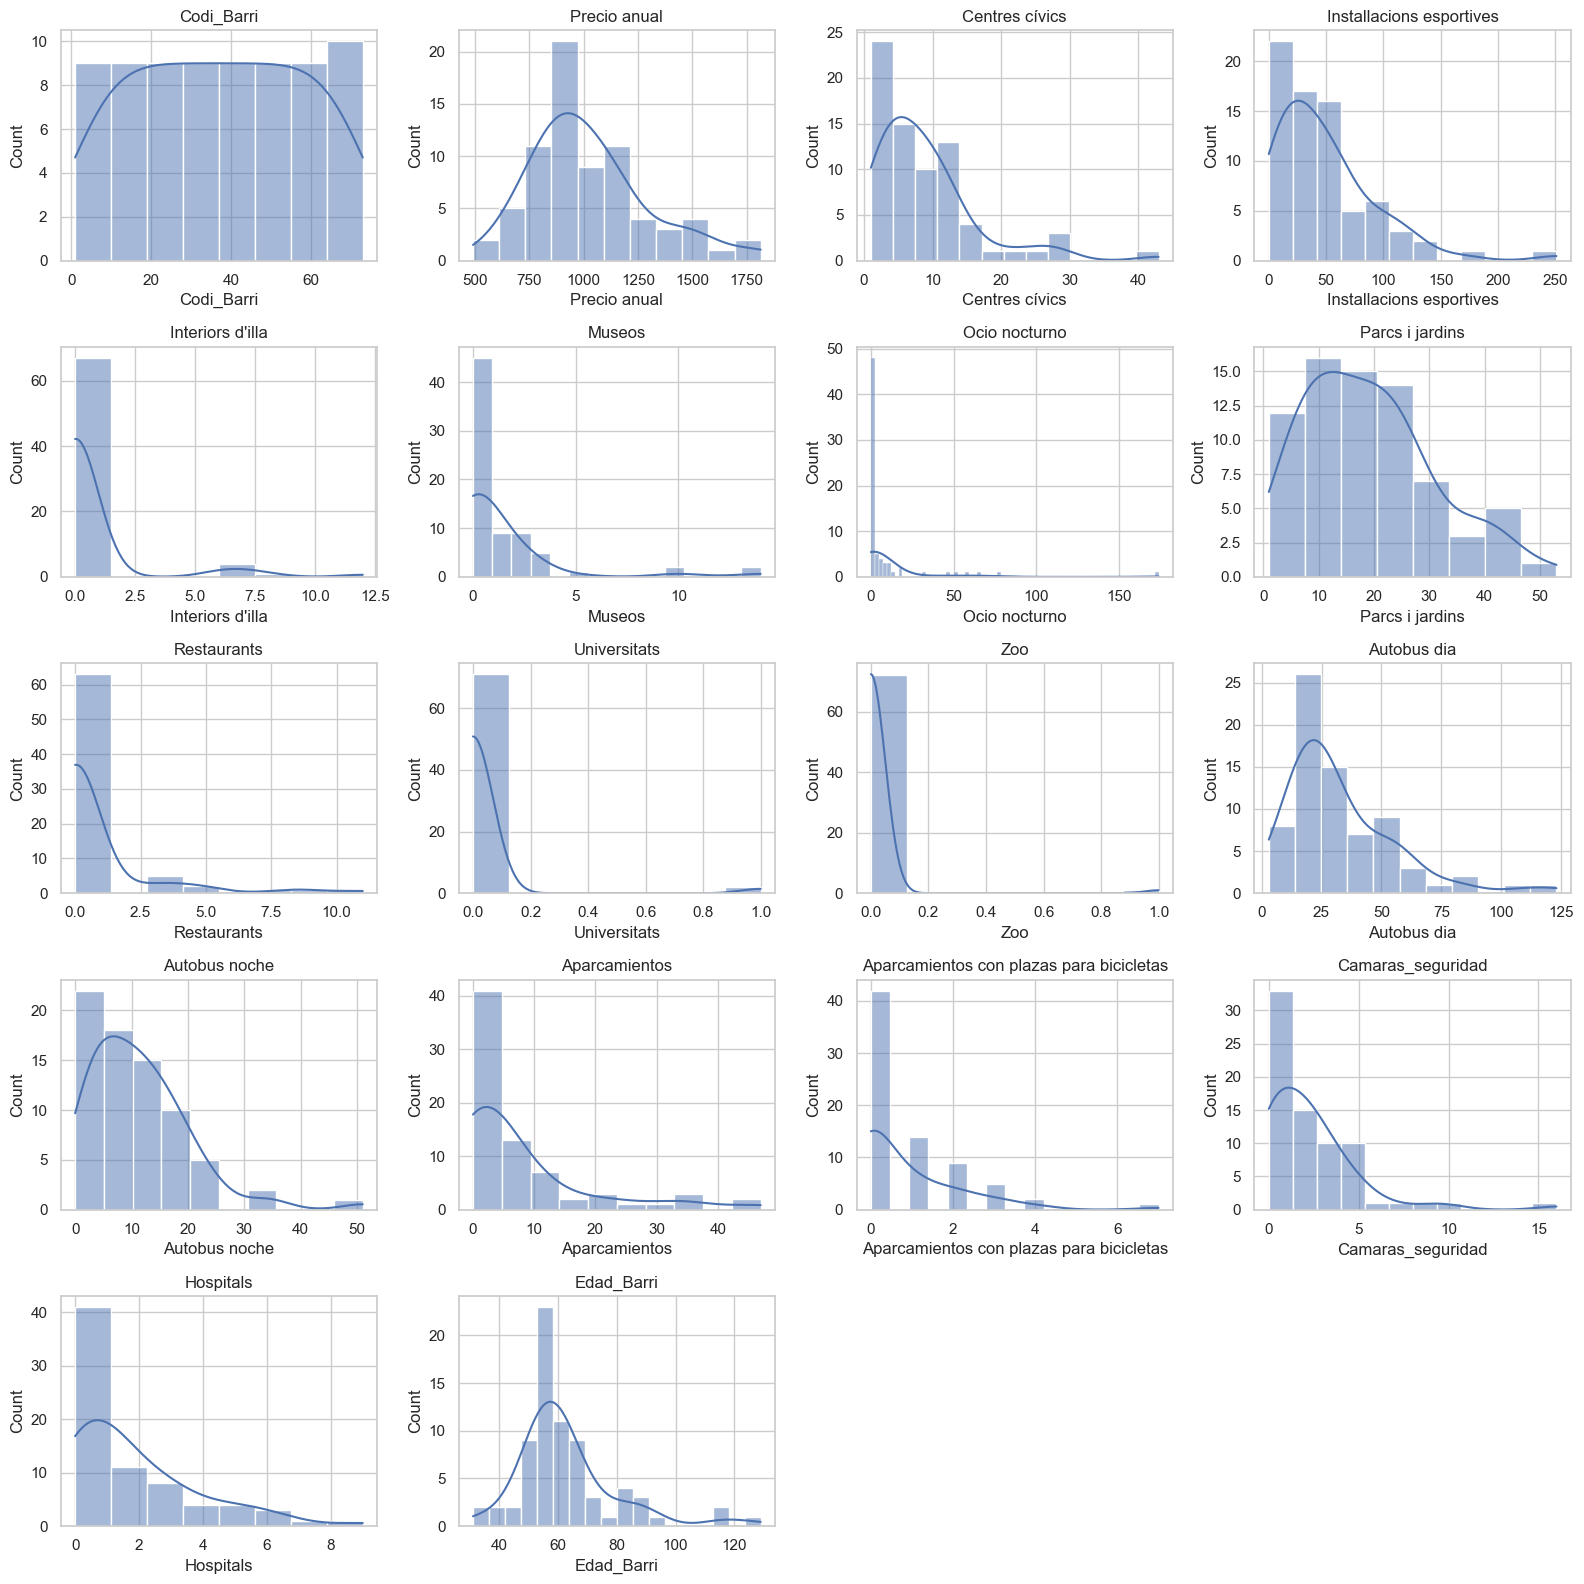

In [479]:
sns.set(style="whitegrid")

# Calcular el número de filas y columnas necesarias para acomodar todos los subgráficos
num_columnas = 4
num_filas = (len(df.columns) - 1) // num_columnas + 1

# Crear la figura y los subgráficos
plt.figure(figsize=(16, 16))
for i, column in enumerate(df.columns):
    plt.subplot(num_filas, num_columnas, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(column)
    plt.tight_layout()
plt.savefig('Histograma de variables.png')
plt.show()

En estos histogramas podemos observar para cada variable:
    
- Codi_Districte:
- Codi_Barri:
- Lloguer_mitja: 
- Precio anual: Trata de haber una normalidad en los datos pero se extiende su forma. pueden ser outliers.
- Centres cívics: No es normal, hay outliers y  vemos que hay 15 barrios que contienen la mayoria de este
- Installacions esportives: No es normal, hay outliers y vemos que mas de 20 barrios tienen al menos un rango de entre 0 y 20 centros deportivos, los demas barrios tienen  mas de 20 instalaciones deportivas. 
- Interiors d'illa:  No es normal, hay outliers y vemos que hay mas de 60 barrios que no tienen este equipamiento.
- Museos: No es normal, hay outliers y vemos que hay mas de 40 barrios que no tienen este equipamiento.
- Ocio nocturno:  No es normal, hay outliers y vemos que hay mas de 40 barrios que no tienen Ocio nocturno. 
- Parcs i jardins: No es normal y tiene outliers, sin embargo vemos que esta variable esta mejor distribuida entre los barrios.
- Restaurants:  No es normal, hay outliers y vemos que hay mas de 40 barrios que no tienen Restaurants.
- Universitats: No es normal, hay outliers y vemos que hay mas de 70 barrios que no tienen este equipamiento.
- Zoo:  No es normal, hay outliers y vemos que hay mas de 70 barrios que no tienen este equipamiento.
- Autobus dia: No es normal, hay outliers y vemos que el mayor valor es el que representa que mas de 20 barrios tienen 20 paradas de autobus dia.
- Autobus noche:  No es normal, hay outliers y vemos que al rededor de 21 barrios tienen pocas paradas de autobus noche. 
- Aparcamientos:  No es normal, hay outliers y vemos que la mayoria de barrios tienen pocos acarcamientos o no tienen. 
- Aparcamientos con plazas para bicicletas:  No es normal, hay outliers y vemos que la mayoria de barrios no tienen o tienen muy pocos aparcamiento con plazas para bicicletas. 
- Camaras_seguridad: No es normal, hay outliers y vemos que mas de 30 barrios no tienen camaras de seguridad. 
- Hospitals: No es normal, hay outliers y vemos que la mayoria de barrios tienen entre 0 y 1 hospitales
- Edad_Barri: No es normal, hay outliers y vemos que la edad de los barrios se concentra en un rango de entre 50 y 60 años. tambien hay barrios muy viejos con 120 años. 

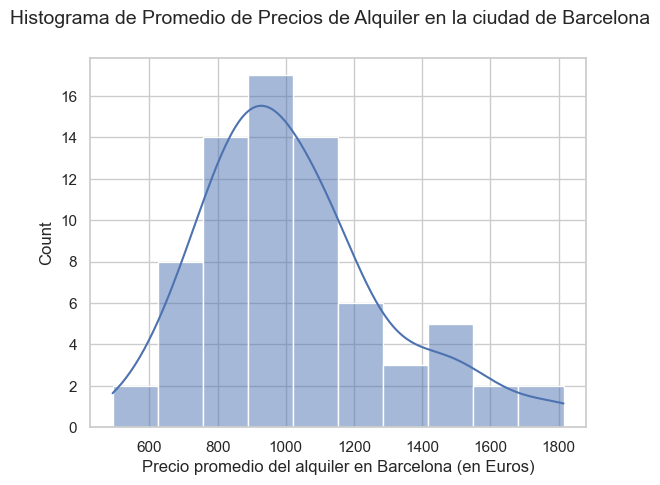

In [480]:
sns.histplot(df['Precio anual'], bins=10, kde=True)
plt.suptitle("Histograma de Promedio de Precios de Alquiler en la ciudad de Barcelona", size= 14)
plt.xlabel("Precio promedio del alquiler en Barcelona (en Euros)")
plt.savefig('Histograma de Promedio de Precios de Alquiler en la ciudad de Barcelona.png')
plt.show()

#### Variable Target:   Precio anual
En esta grafica vemos que  los precios del alquiler de la mayoria de los barrios de Barcelona, 17 barrios, se encuentra entre 900 y 1000  euros, y luego la cantidad de barrios se va reduciendo en los rangos inmediatamente cercanos como en entre 800 y 1100, donde la cantidad de barrios con estos precios son 14 cada uno, ademas vemos que la cantidad de barrios se van reduciendo a medida que los precios aumentan yço disminuyen  desde el rango 900 - 1000, lo cual hace que la forma de nuestros datos trate de ser una campana, podria representar cierta normalidad de nuestros datos a pesar que haya un sesgo en el rango 1500, donde la tendencia a la disminucion de la cantidad de barrios cambia y aumenta pero es minimo el cambio. 

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\3728225255.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Precio anual', ci=None)


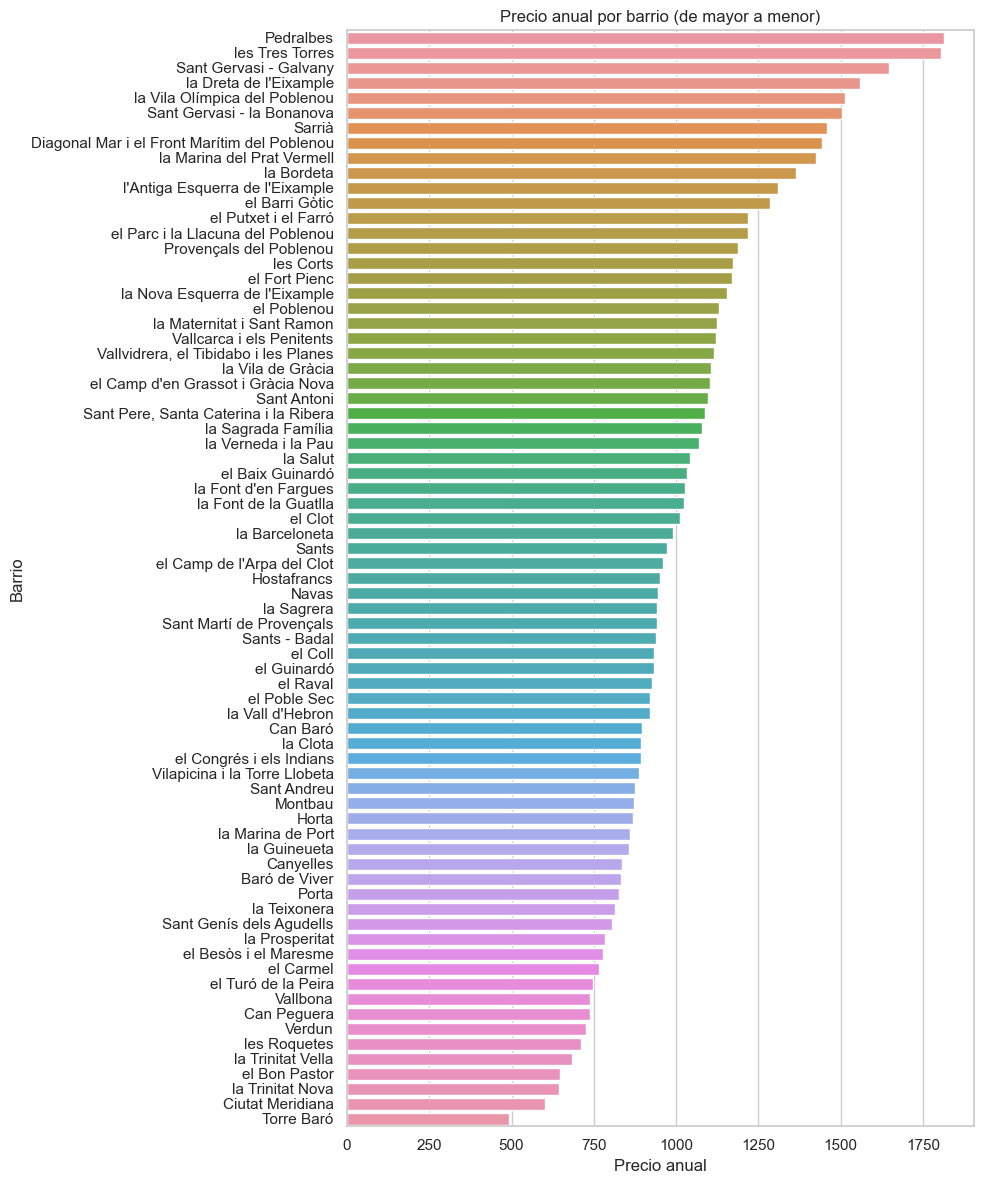

In [481]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Precio anual', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Precio anual', ci=None)

plt.title('Precio anual por barrio (de mayor a menor)')
plt.xlabel('Precio anual')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('Barras Precio anual.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\1353927251.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Centres cívics', ci=None)


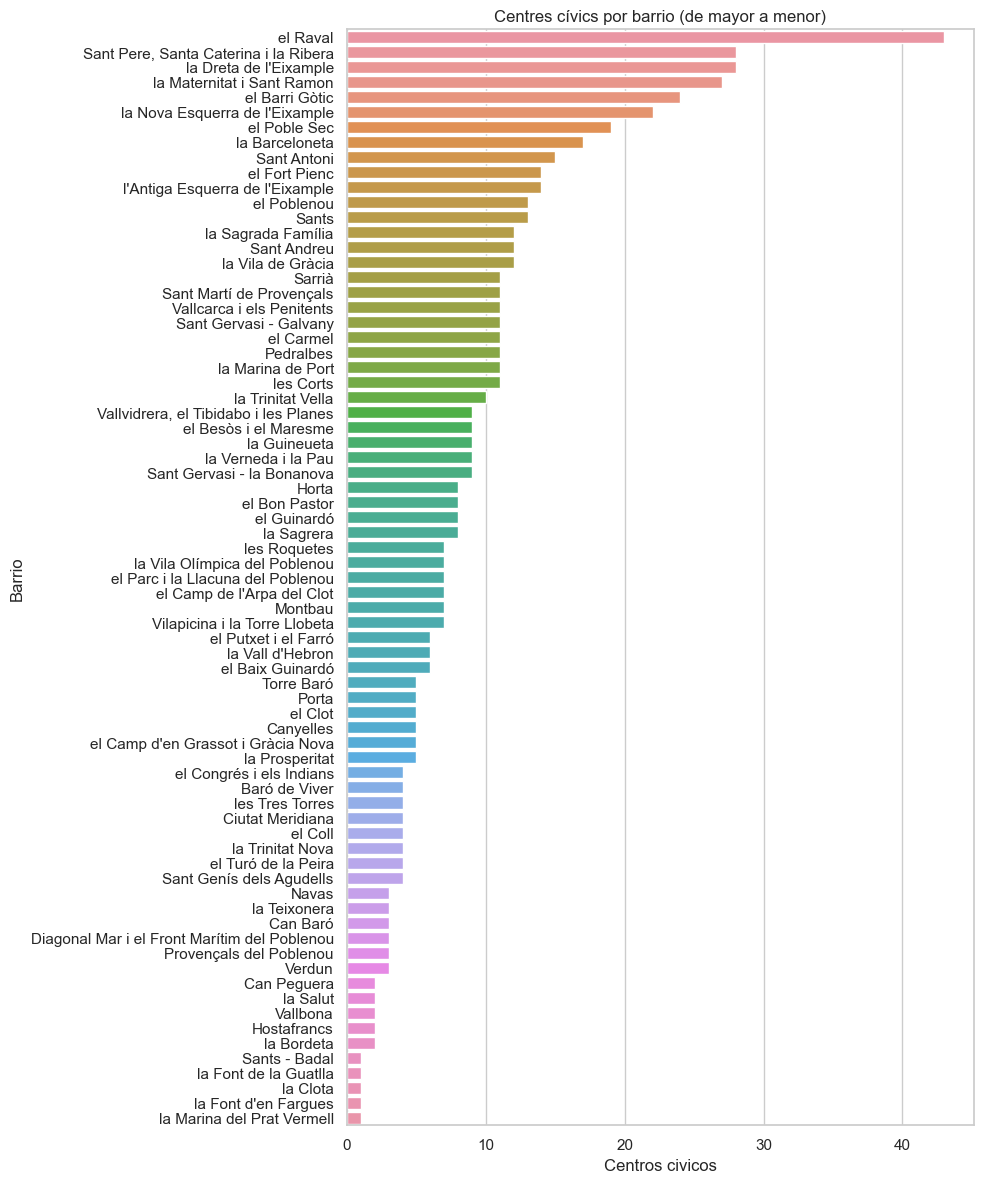

In [482]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Centres cívics', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Centres cívics', ci=None)

plt.title('Centres cívics por barrio (de mayor a menor)')
plt.xlabel('Centros civicos')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('Barras centros civicos.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\453577485.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Installacions esportives', ci=None)


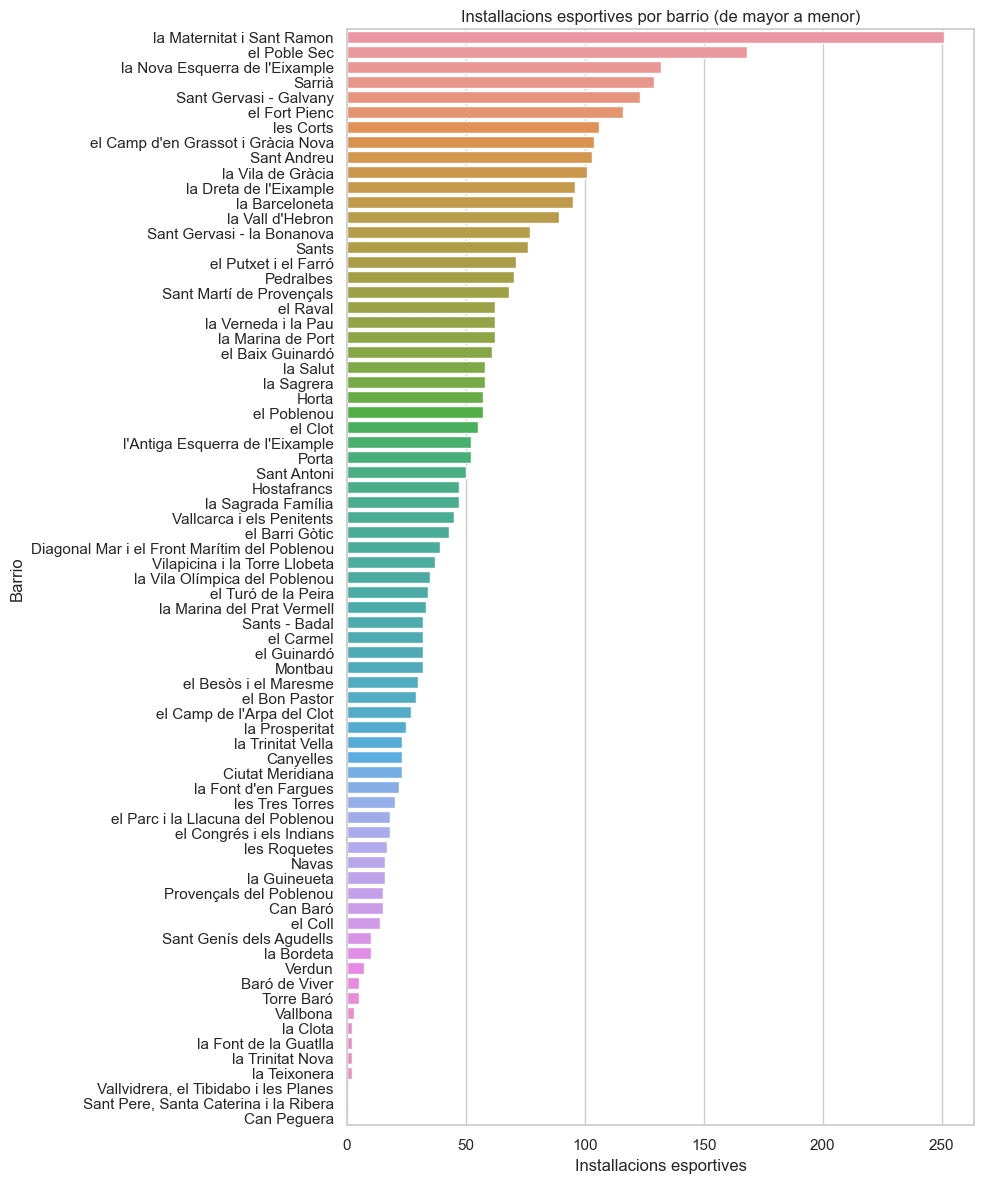

In [483]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Installacions esportives', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Installacions esportives', ci=None)

plt.title('Installacions esportives por barrio (de mayor a menor)')
plt.xlabel('Installacions esportives')
plt.ylabel('Barrio')
plt.tight_layout()
plt.savefig('instalaciones deportivas.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\874999004.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Ocio nocturno', ci=None)


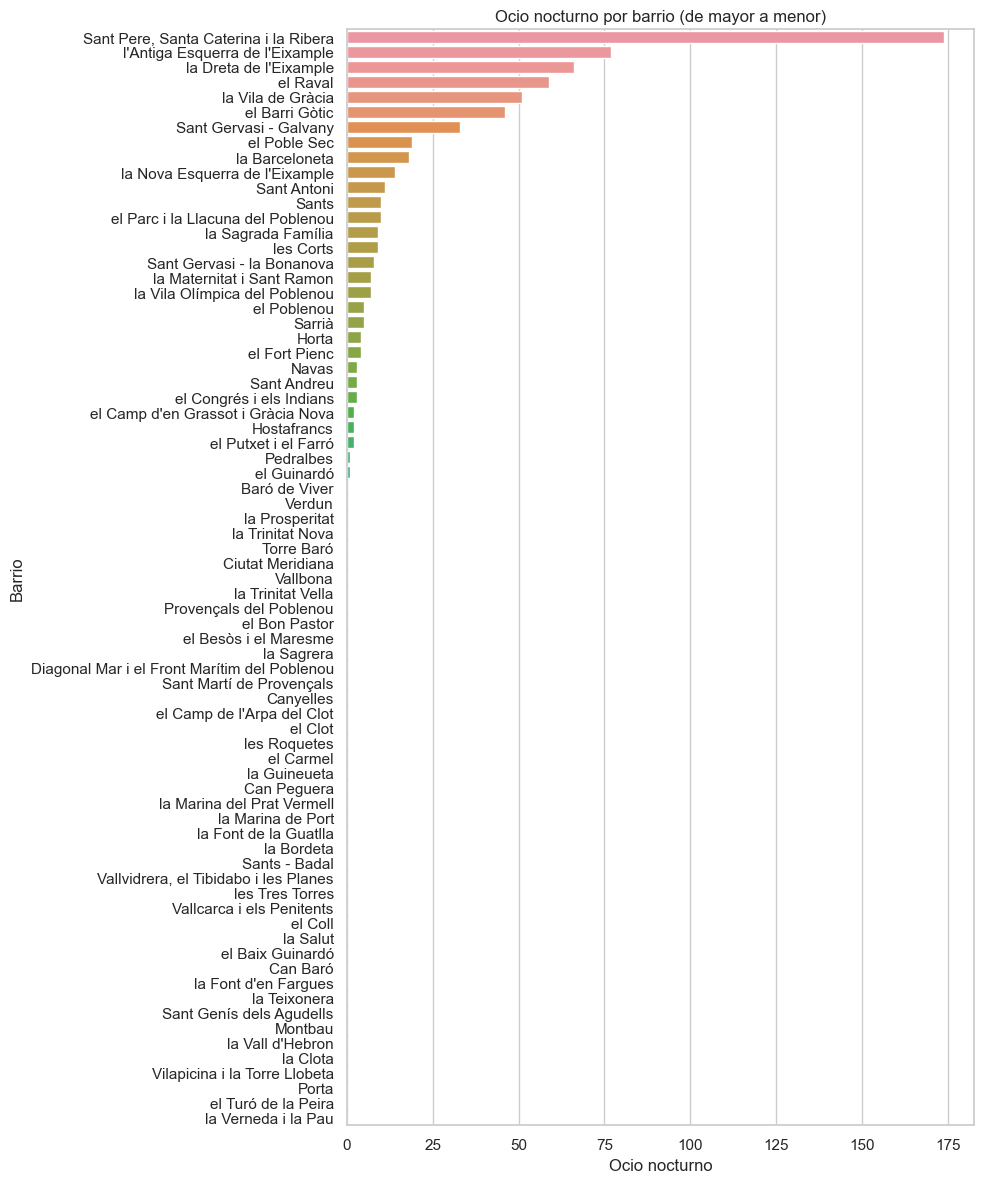

In [484]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Ocio nocturno', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Ocio nocturno', ci=None)

plt.title('Ocio nocturno por barrio (de mayor a menor)')
plt.xlabel('Ocio nocturno')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('ocio nocturno.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\1357393658.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Autobus dia", ci=None)


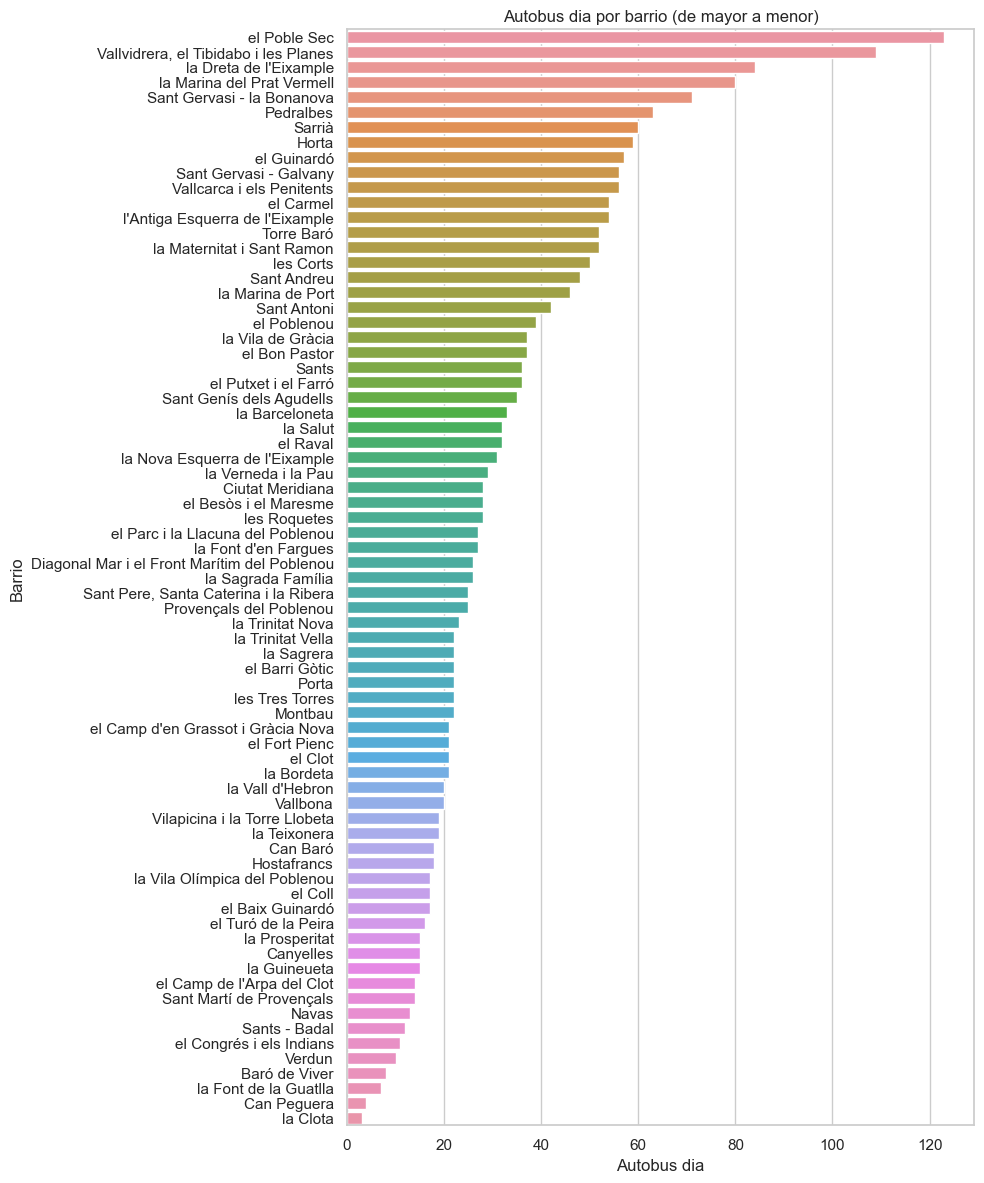

In [485]:
Alquiler_data_sorted = Alquiler_data.sort_values(by="Autobus dia", ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Autobus dia", ci=None)

plt.title("Autobus dia por barrio (de mayor a menor)")
plt.xlabel("Autobus dia")
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('autobus dia.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\597823475.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Museos", ci=None)


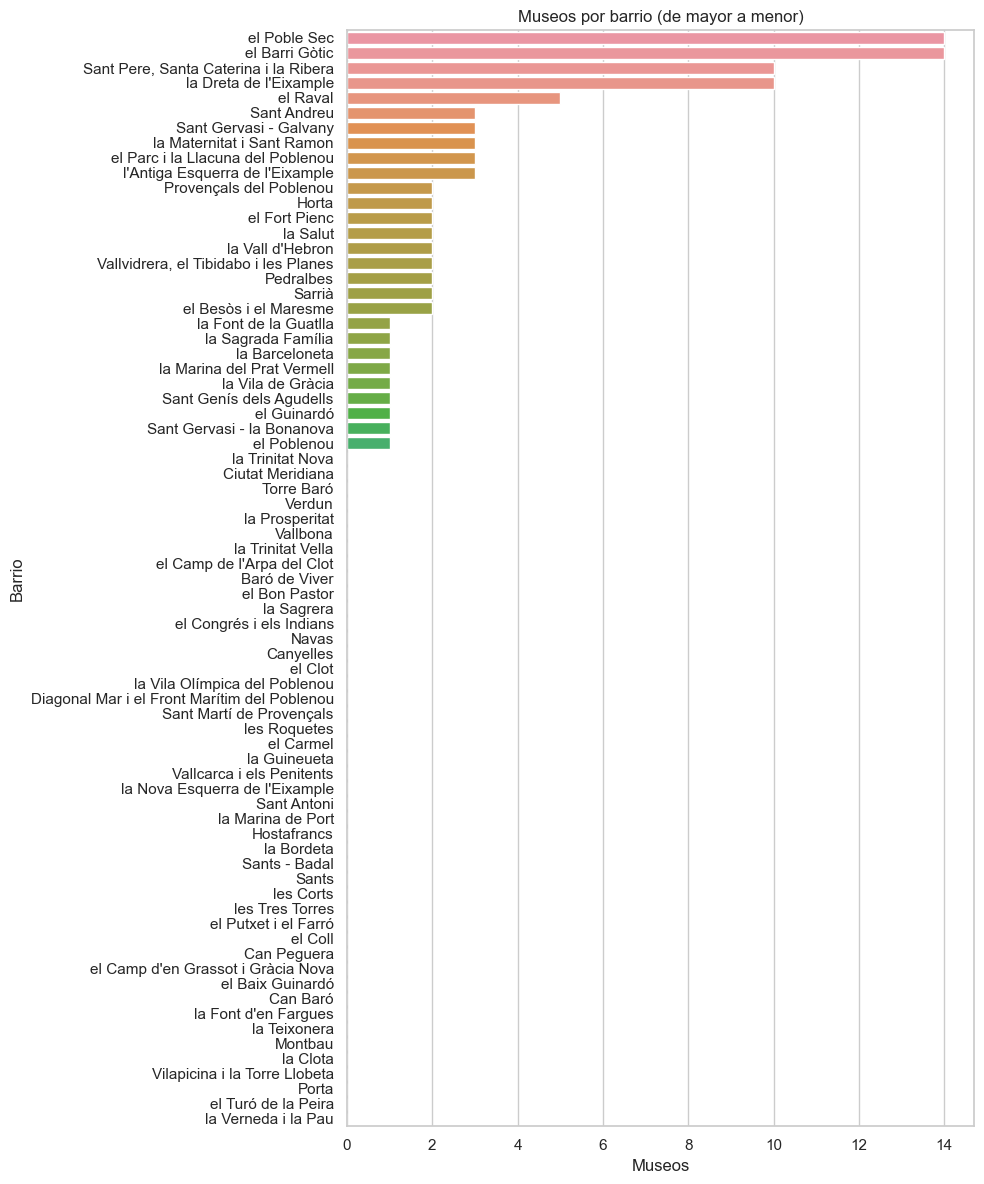

In [486]:
Alquiler_data_sorted = Alquiler_data.sort_values(by="Museos", ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x="Museos", ci=None)

plt.title("Museos por barrio (de mayor a menor)")
plt.xlabel("Museos")
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Museos.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\1630730703.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Restaurants', ci=None)


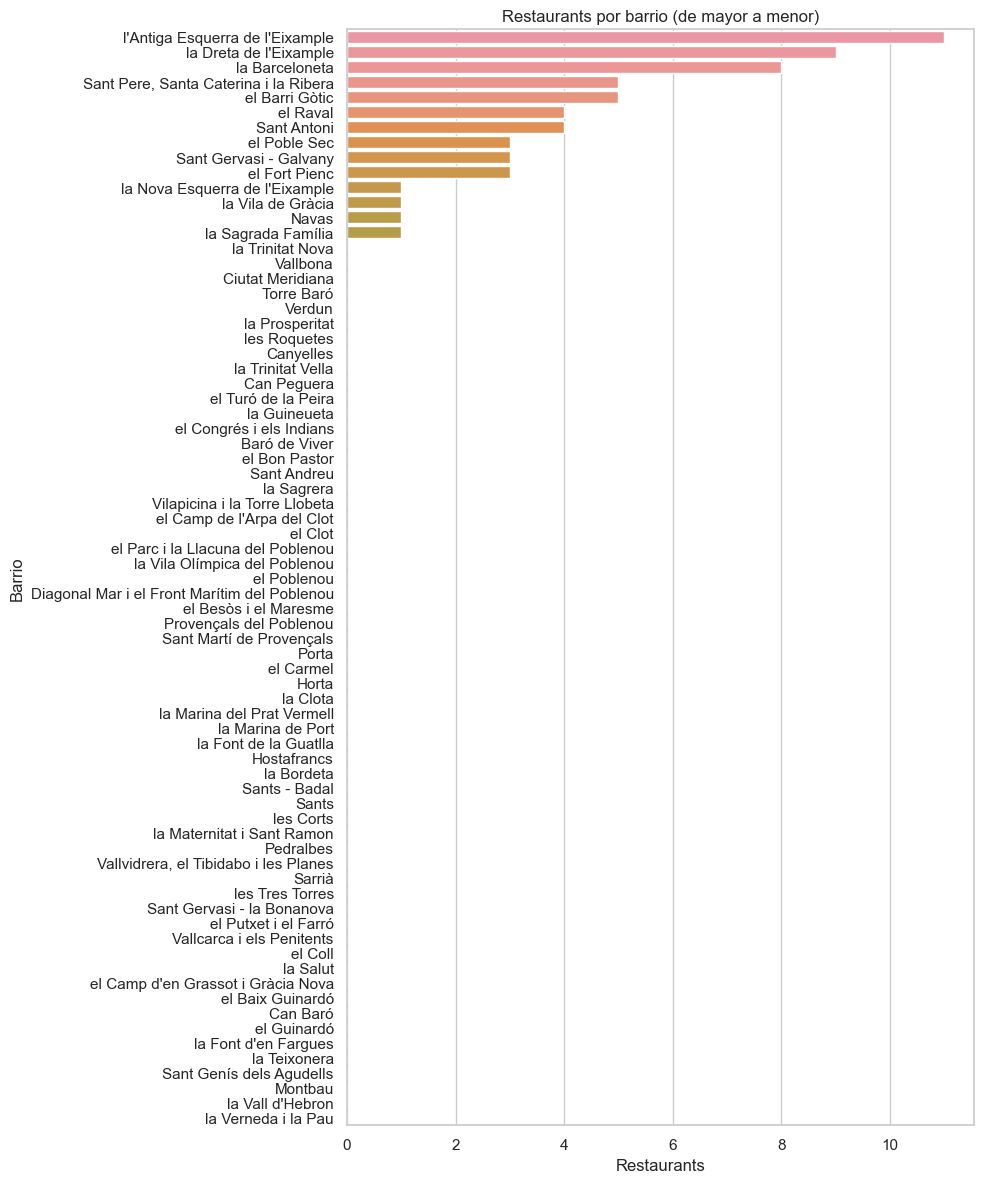

In [487]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Restaurants', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Restaurants', ci=None)

plt.title('Restaurants por barrio (de mayor a menor)')
plt.xlabel('Restaurants')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('Restaurantes.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\3469884844.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Camaras_seguridad', ci=None)


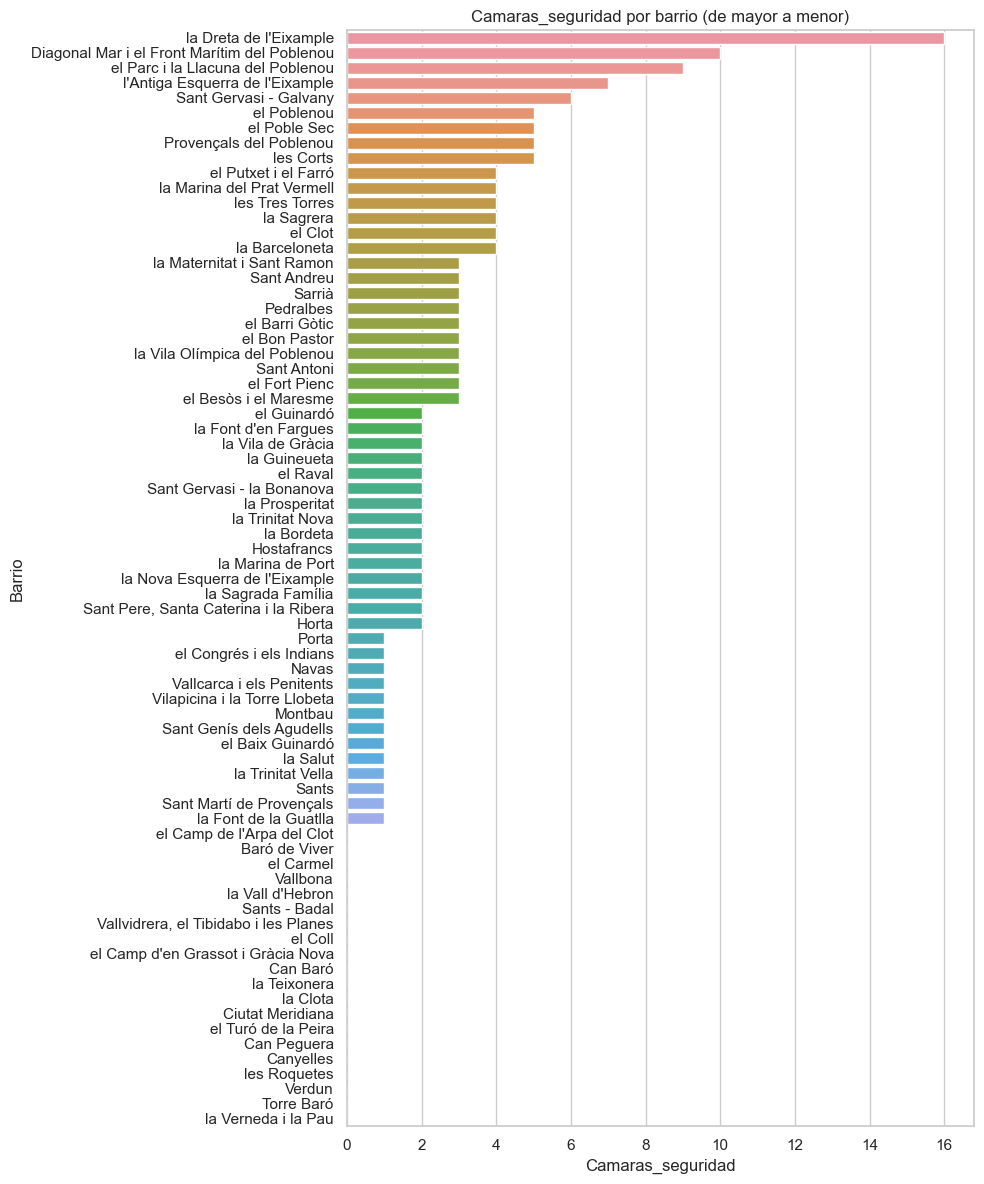

In [488]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Camaras_seguridad', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Camaras_seguridad', ci=None)

plt.title('Camaras_seguridad por barrio (de mayor a menor)')
plt.xlabel('Camaras_seguridad')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('camaras de seguridad.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\2443712574.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Autobus noche', ci=None)


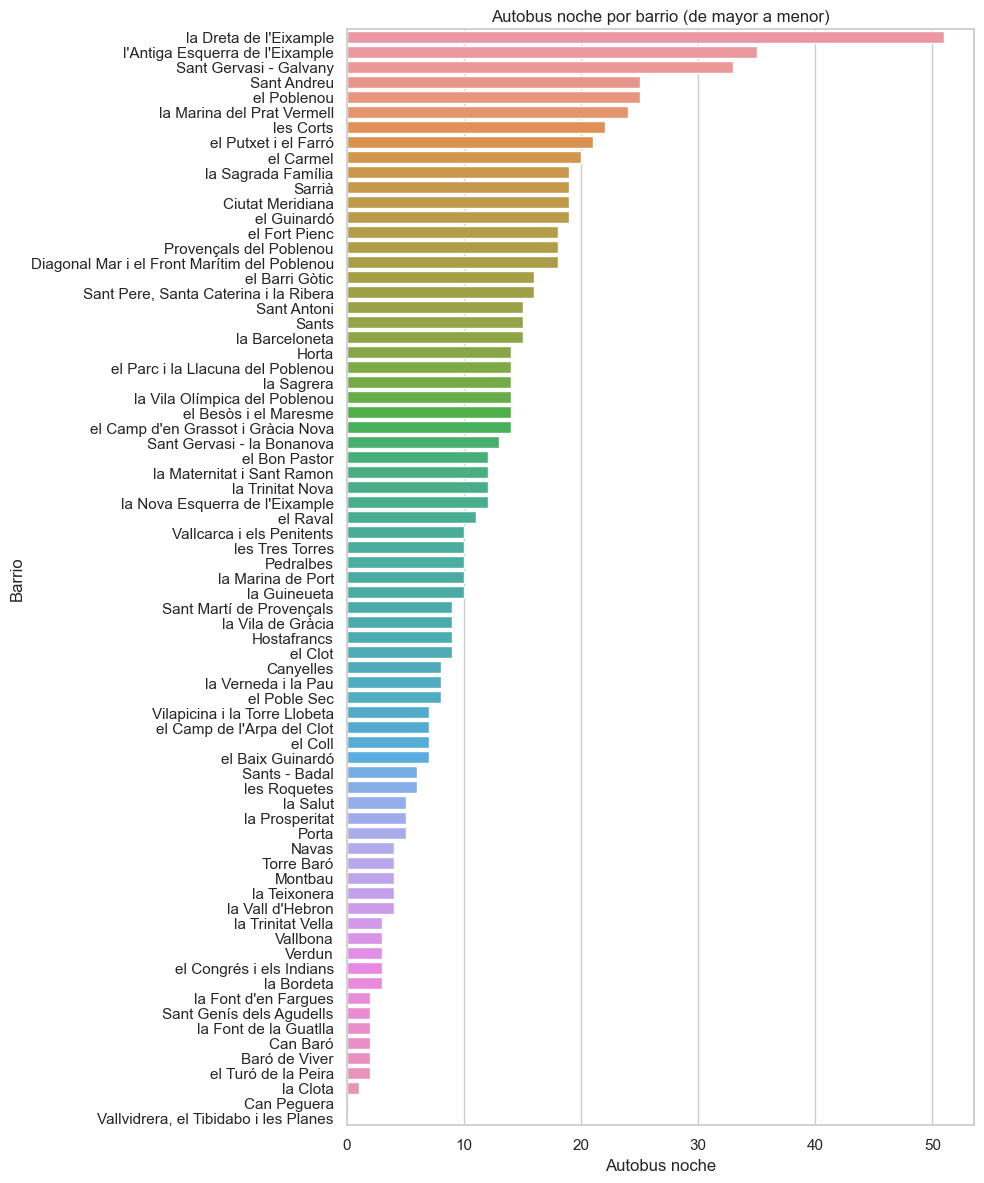

In [489]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Autobus noche', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Autobus noche', ci=None)

plt.title('Autobus noche por barrio (de mayor a menor)')
plt.xlabel('Autobus noche')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('autobus noche.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\835796606.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Aparcamientos', ci=None)


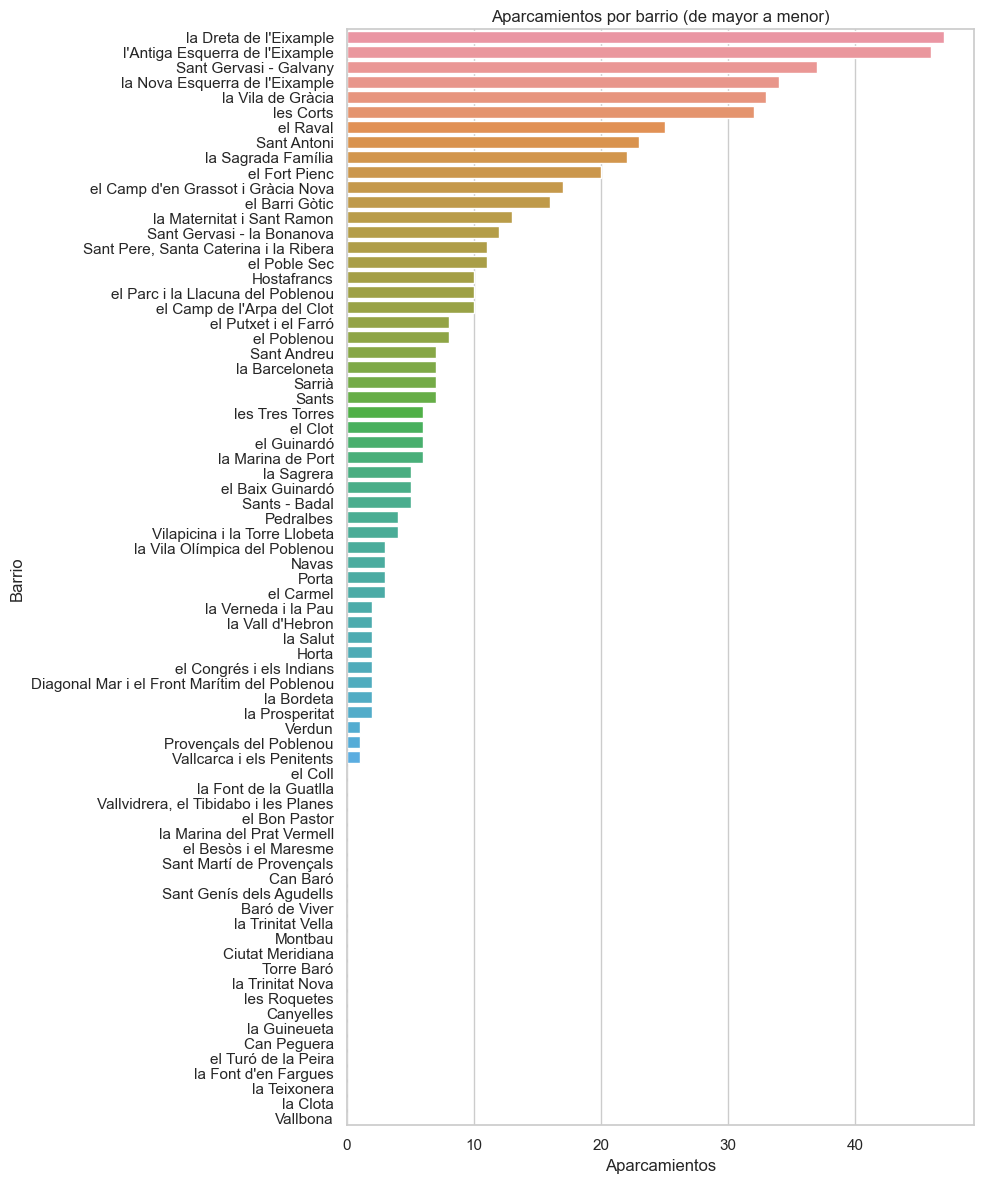

In [490]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Aparcamientos', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Aparcamientos', ci=None)

plt.title('Aparcamientos por barrio (de mayor a menor)')
plt.xlabel('Aparcamientos')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('aparcamientos.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\1743488320.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Aparcamientos con plazas para bicicletas', ci=None)


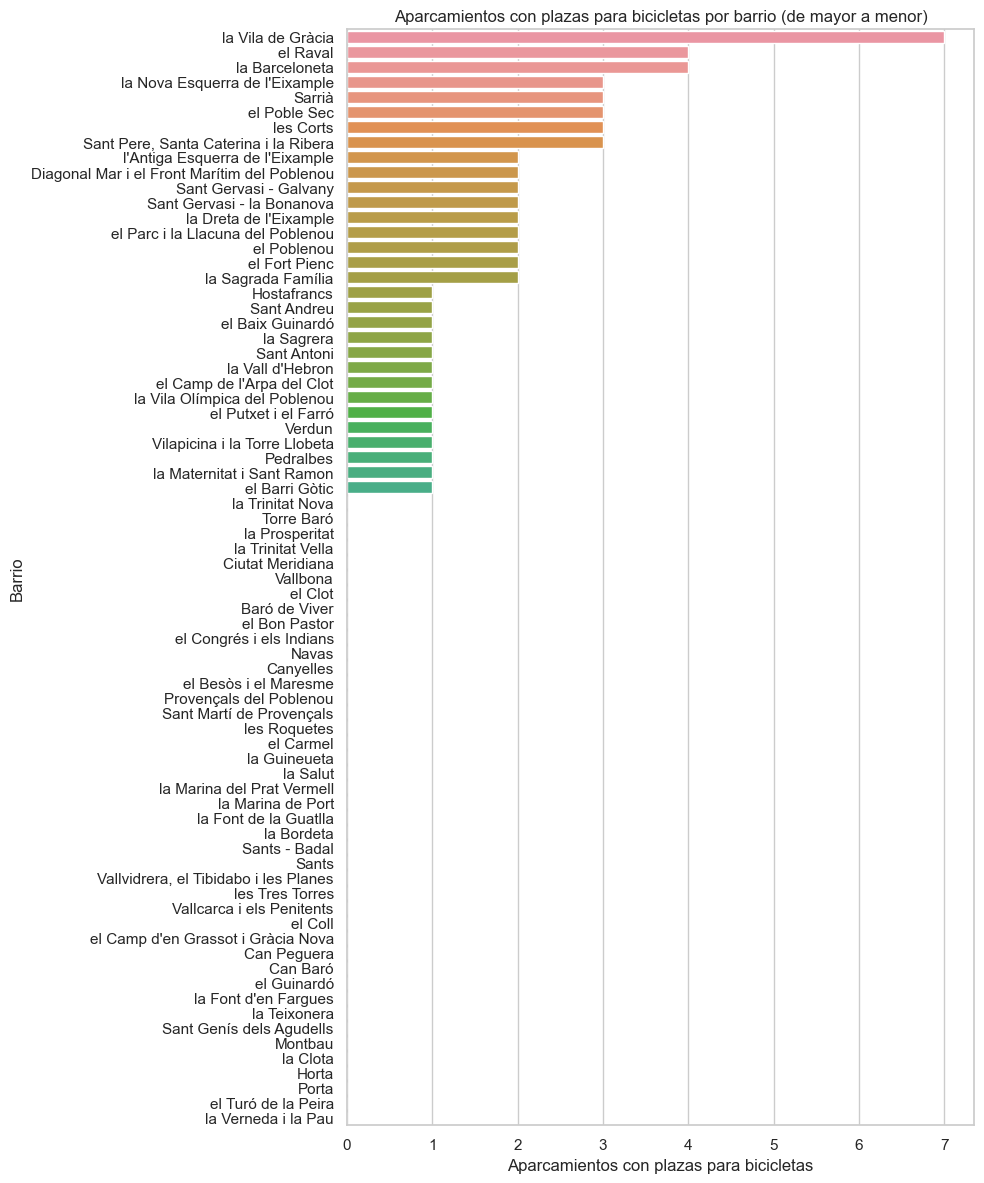

In [491]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Aparcamientos con plazas para bicicletas', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Aparcamientos con plazas para bicicletas', ci=None)

plt.title('Aparcamientos con plazas para bicicletas por barrio (de mayor a menor)')
plt.xlabel('Aparcamientos con plazas para bicicletas')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('aparcamiento-bicicletas.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\3449018541.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Hospitals', ci=None)


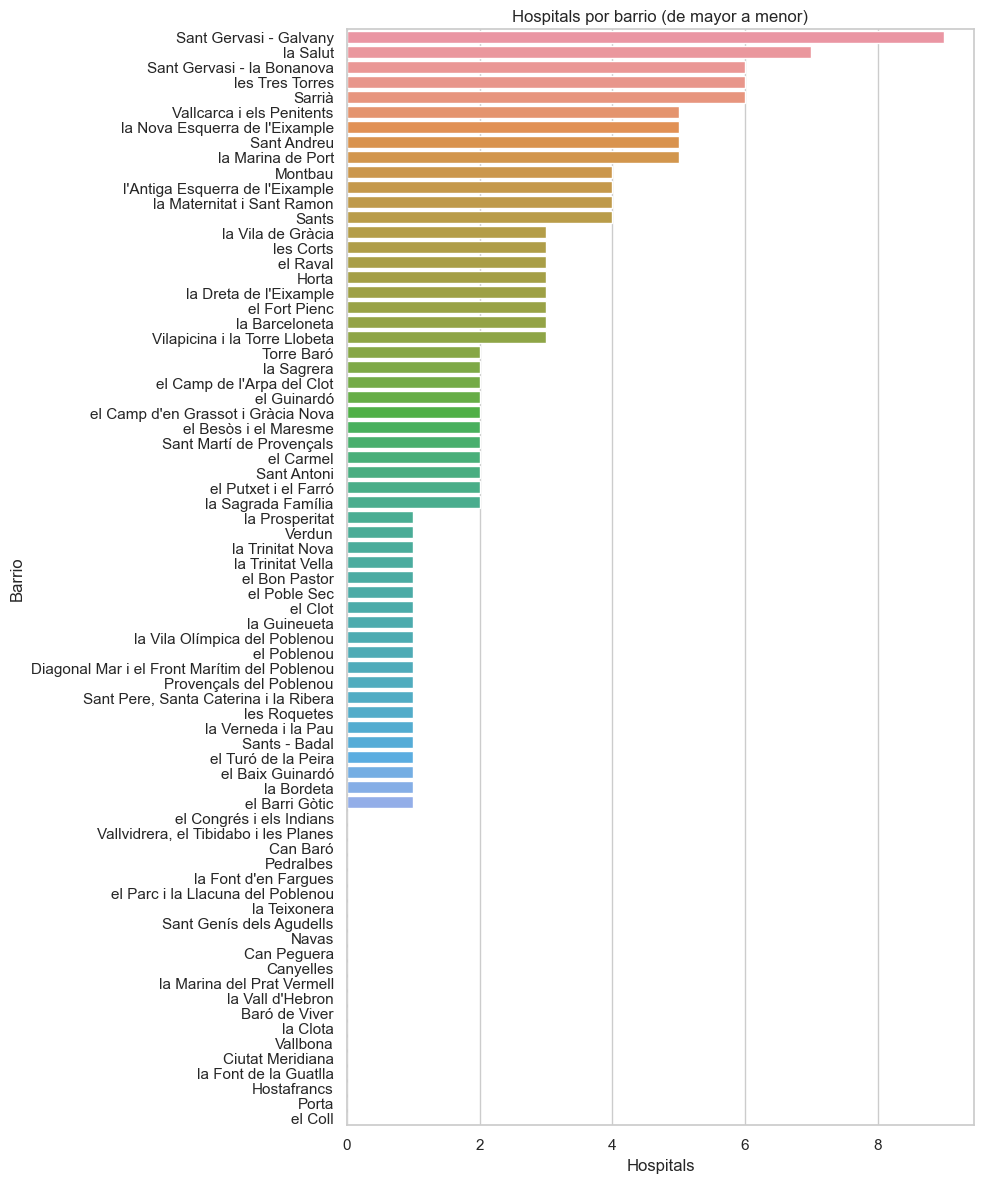

In [492]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Hospitals', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Hospitals', ci=None)

plt.title('Hospitals por barrio (de mayor a menor)')
plt.xlabel('Hospitals')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('hoispitales.png')
plt.show()

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\3737161982.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Edad_Barri', ci=None)


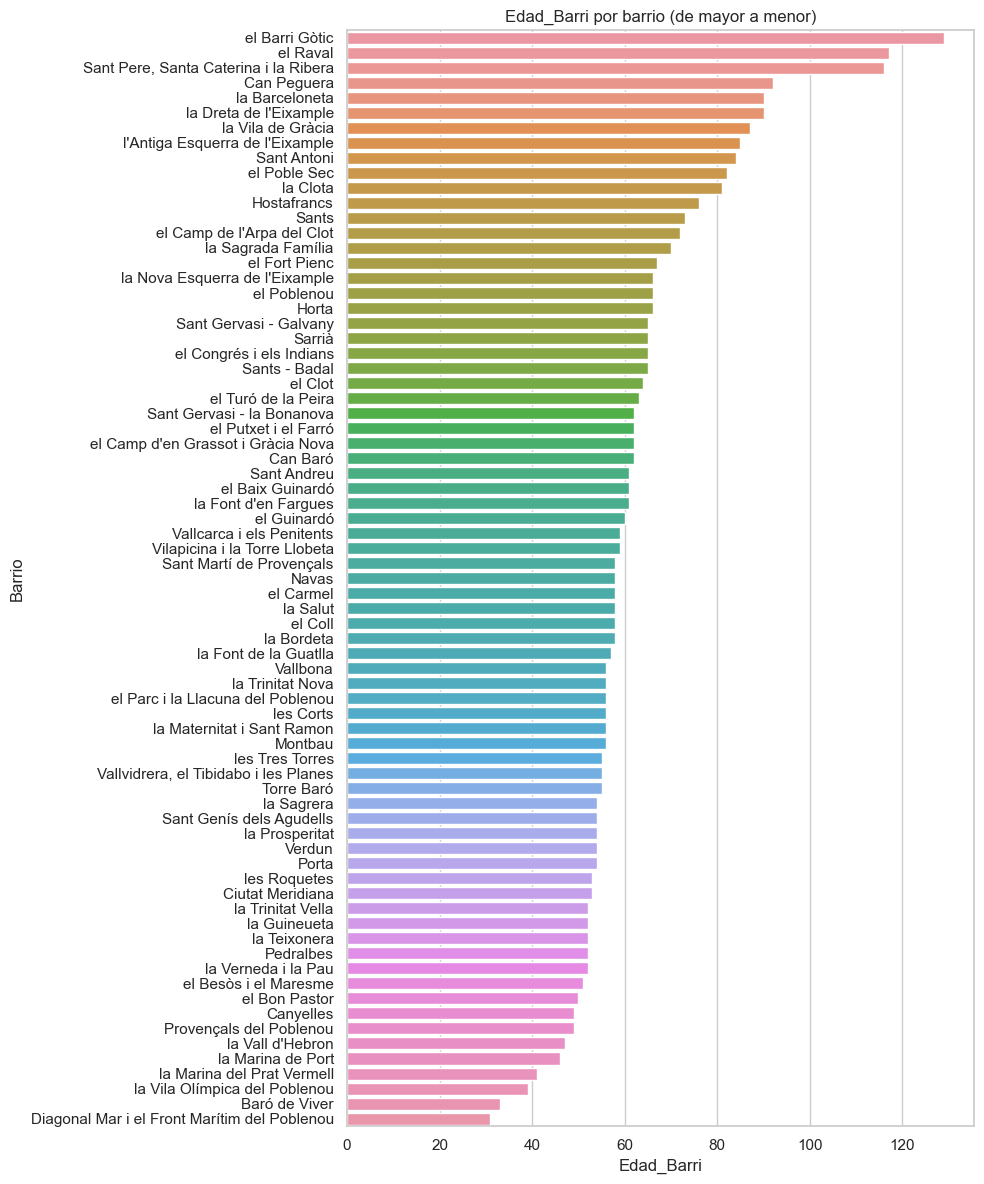

In [493]:
Alquiler_data_sorted = Alquiler_data.sort_values(by='Edad_Barri', ascending=False)

plt.figure(figsize=(10, 12))

sns.barplot(data=Alquiler_data_sorted, y='Nom_Barri', x='Edad_Barri', ci=None)

plt.title('Edad_Barri por barrio (de mayor a menor)')
plt.xlabel('Edad_Barri')
plt.ylabel('Barrio')

plt.tight_layout()
plt.savefig('edad del barrio.png')
plt.show()

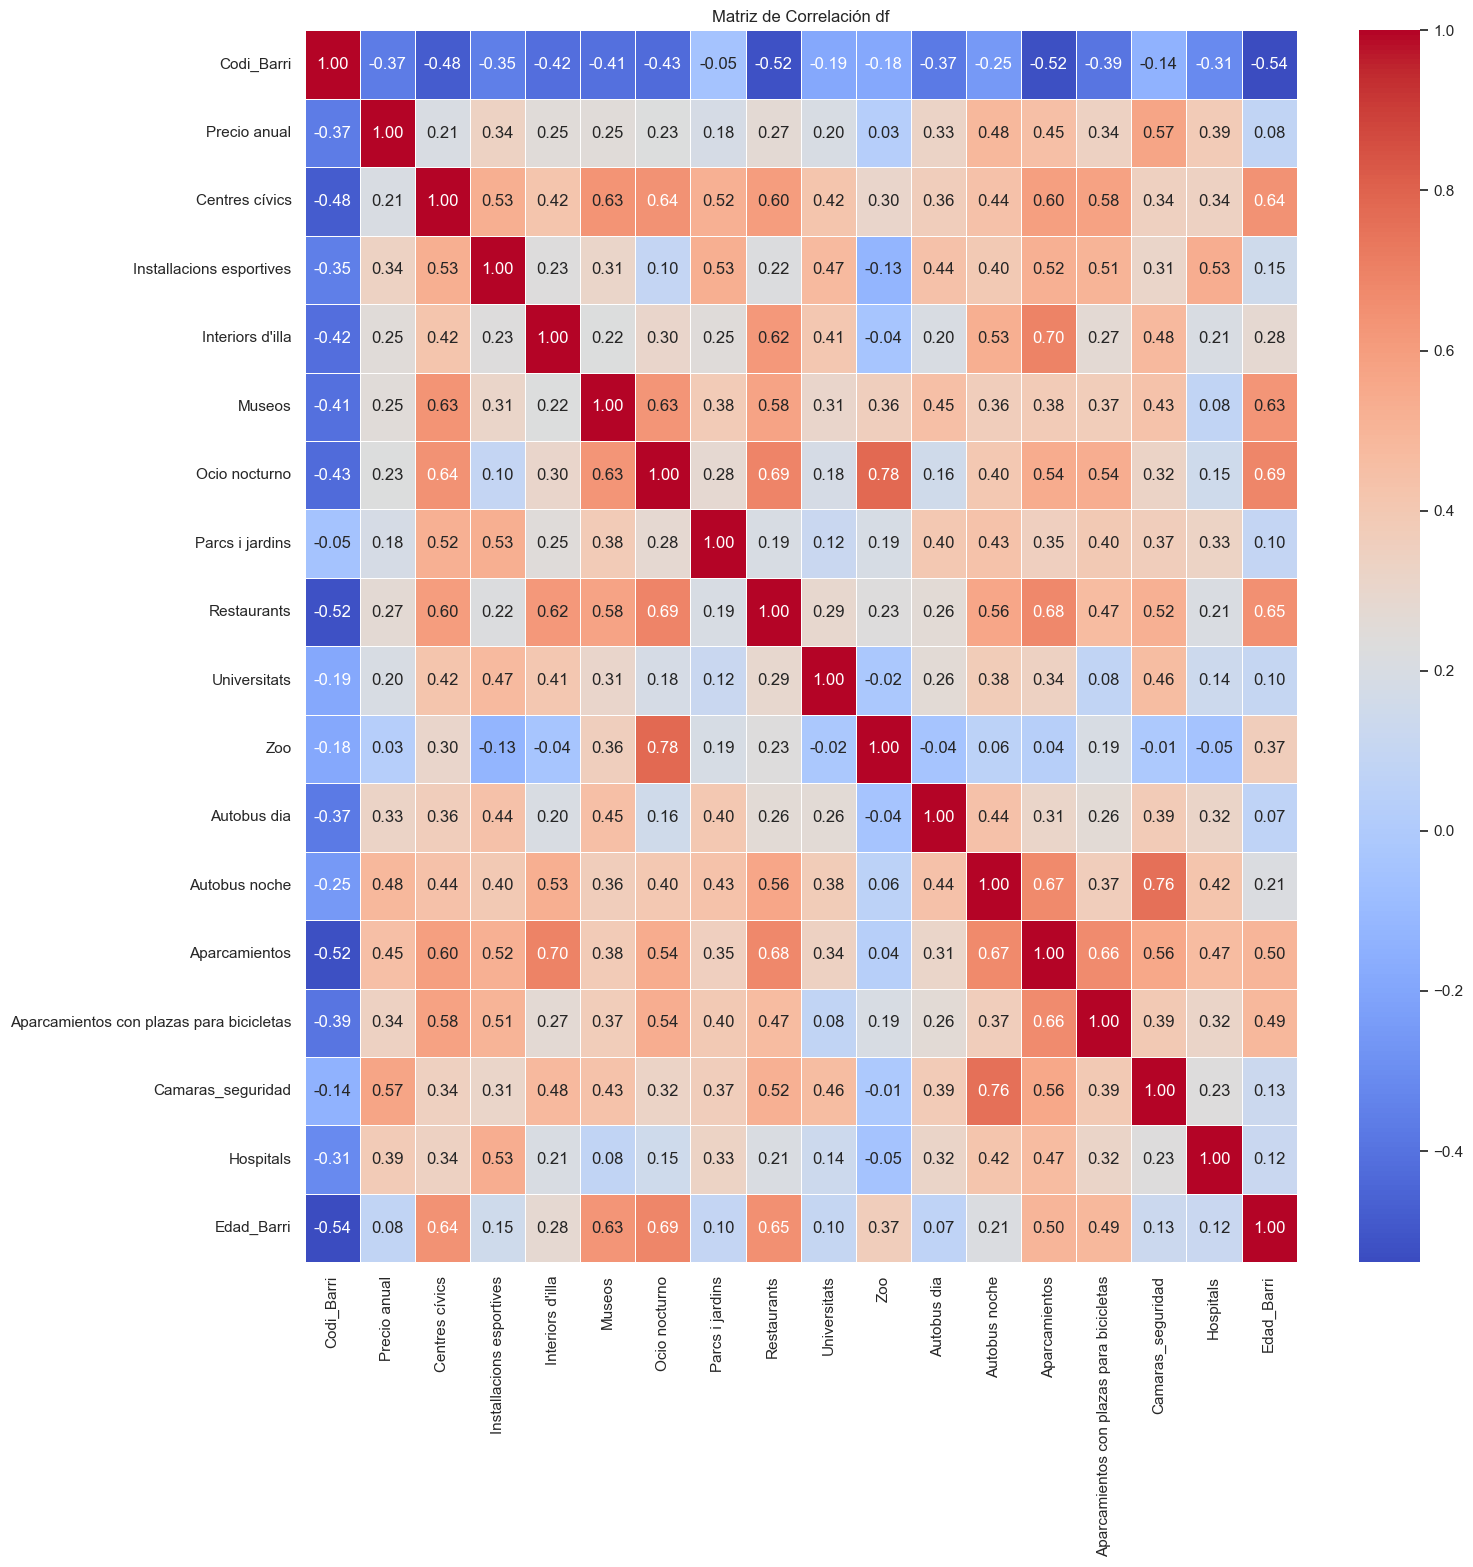

In [494]:
correlation_matrix = df.corr()
sns.set(style="white")
plt.figure(figsize=(16, 16))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación df")
plt.savefig('Matriz de correlacion.png')
plt.show()

- Codi_Districte:
- Codi_Barri:
- Precio anual: se correlaciona con Camaras_seguridad y hospitales, autobus noche.
- Centres cívics: se correlaciona con Museos, Ocio nocturno, Edad_Barri, aparcamientos y restaurantes.
- Installacions esportives: se correlaciona con centros civicos, parques y jardines, universidades, aparcamientos y hospitales.
- Interiors d'illa:  se correlaciona con Restaurantes, Aparcamientos y autobus noche. 
- Museos: se correlaciona con Centres cívicos, Ocio nocturno, restaurantes y Edad_Barri
- Ocio nocturno:  se correlaciona con Zoo, Centros cívicos, restaurantes,  Edad_Barri y Ocio nocturno
- Parcs i jardins: se correlaciona con Centros cívicos y CAPs
- Restaurants: se correlaciona con Ocio nocturno, Aparcamientos, interior de manzanas y Edad_Barri 
- Universitats:se correlaciona con Camaras_seguridad, instalaciones deportivas y centros civicos.
- Zoo: se correlaciona con  Ocio nocturno.
- Autobus dia: se correlaciona con Museos, autobus noche y parques y jardines.
- Autobus noche:se correlaciona con Camaras_seguridad, restaurantes, interiores de manzanas, aparcamientos y precio anual.
- Estaciones de autobus: no tiene una relacion fuerte con otras variables tal vez alquiler de vehiculos.
- Alquiler de vehiculos: no tiene una relacion fuerte con otras variables tal vez estaciones de autobus.
- Aparcamientos: se correlaciona con interiores de manzana, restaurantes, Aparcamientos con plazas para bicicletas, centros civicos, autobus noche, edad del barrio y  Camaras_seguridad.
- Aparcamientos con plazas para bicicletas: se correlaciona con Aparcamientos, centros civicos y Ocio nocturno
- Gasolineras: se correlaciona con no se relaciona con ninguna otra variable
- Puntos de recarga electrica: no tiene una relacion fuerte con otras variables tal vez con centros civicos aunque no es fuerte su correlacion 
- Camaras_seguridad: se correlaciona con Autobus noche, Aparcamientos,  Precio anual y restaurantes. 
- Hospitals: se correlaciona con instalaciones deportivas, Aparcamientos y autobus noche. 
- Edad_Barri: se correlaciona con restaurantes, museos, ocio nocturno, centros civicos y aparcamientos. 

vamos viendo que las variables se relacionan por su funcionalidad.

- Por ejemplo, podemos decir que donde hay restaurantes, hay ocio nocturno, que tiene una oferta de aparcamientos significativa y cuenta con interiores de manzana que se correlaciona con la edad del barrio estos interiores de manzana su mayoria esta en la cuadricula de la eixample.

- Las camaras de seguridad, se relaciona con la necesidad de seguridad en restaurantes, aparcamientos, autobuses de noche, lo que se ve influenciado en el precio anual del alquiler de la vivienda, pero significaria que debemos pagar por la seguridad de los barrios donde queremos vivir? es una correlacion discrminatoria y socialmente discutible.

- Parques y jardines se correlaciona con centros civicos y con CAPs, que podemos pensar que su funcionalidad es el bienestar social.

Es interesante destacar que nuestra variable Target "Precio Anual" se correlaciona con camaras de seguridad, autobus noche, aparcamientos  y hospitales.

## EDA

In [495]:
X = df.drop(['Codi_Barri', "Precio anual"], axis=1)
y = df["Precio anual"]

#### TEST DE NORMALIDAD SHAPIRO

In [496]:
from scipy.stats import shapiro
for x in X.columns.values:
    stat, p = shapiro(X[x])
    print('stat=%.3f, p=%.3f' % (stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

stat=0.806, p=0.000
Probably not Gaussian
stat=0.852, p=0.000
Probably not Gaussian
stat=0.345, p=0.000
Probably not Gaussian
stat=0.502, p=0.000
Probably not Gaussian
stat=0.406, p=0.000
Probably not Gaussian
stat=0.950, p=0.006
Probably not Gaussian
stat=0.442, p=0.000
Probably not Gaussian
stat=0.153, p=0.000
Probably not Gaussian
stat=0.095, p=0.000
Probably not Gaussian
stat=0.847, p=0.000
Probably not Gaussian
stat=0.877, p=0.000
Probably not Gaussian
stat=0.704, p=0.000
Probably not Gaussian
stat=0.692, p=0.000
Probably not Gaussian
stat=0.750, p=0.000
Probably not Gaussian
stat=0.839, p=0.000
Probably not Gaussian
stat=0.842, p=0.000
Probably not Gaussian


Con la prueba de normalidad de shapiro, comprobamos la normalidad de las variables, como resultado nos da que ninguna varialbe es normal.

C:\Users\dpino\AppData\Local\Temp\ipykernel_13576\2720474836.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


<Figure size 800x500 with 0 Axes>

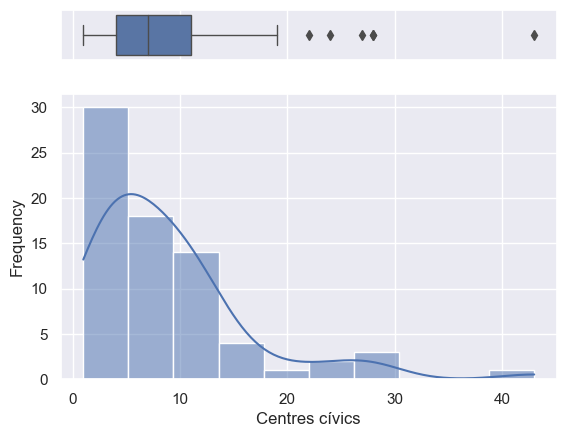

<Figure size 800x500 with 0 Axes>

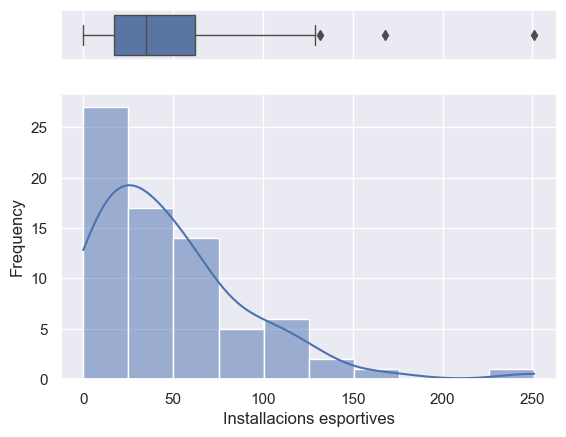

<Figure size 800x500 with 0 Axes>

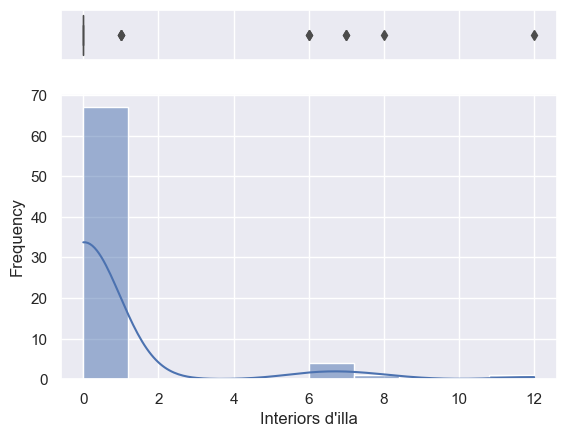

<Figure size 800x500 with 0 Axes>

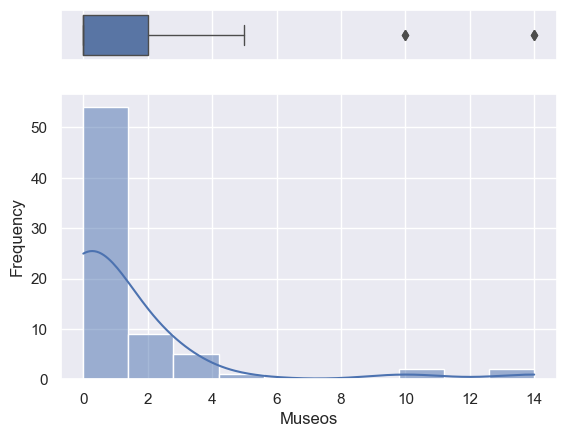

<Figure size 800x500 with 0 Axes>

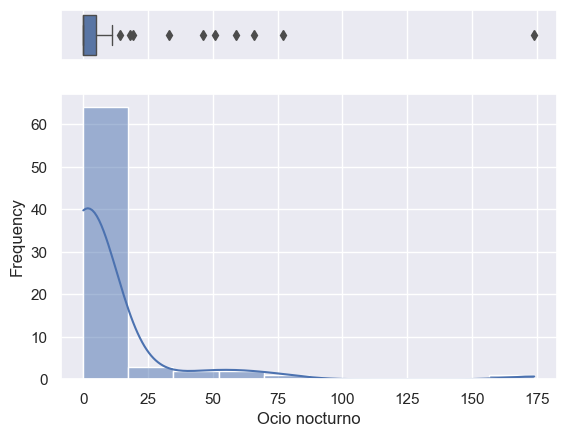

<Figure size 800x500 with 0 Axes>

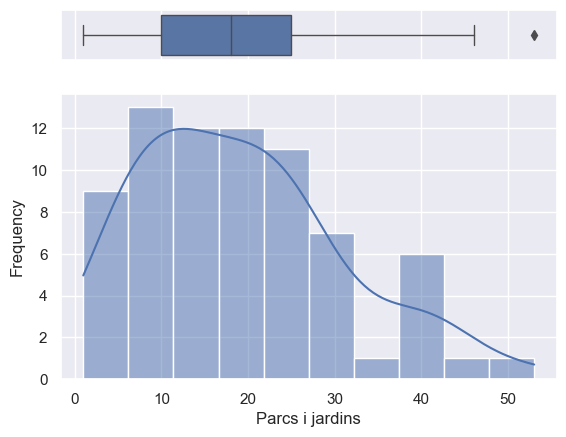

<Figure size 800x500 with 0 Axes>

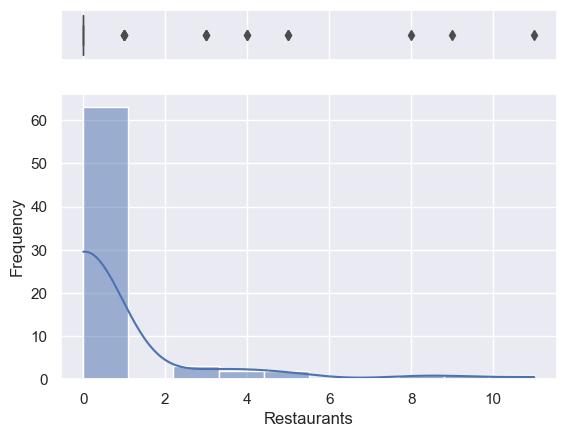

<Figure size 800x500 with 0 Axes>

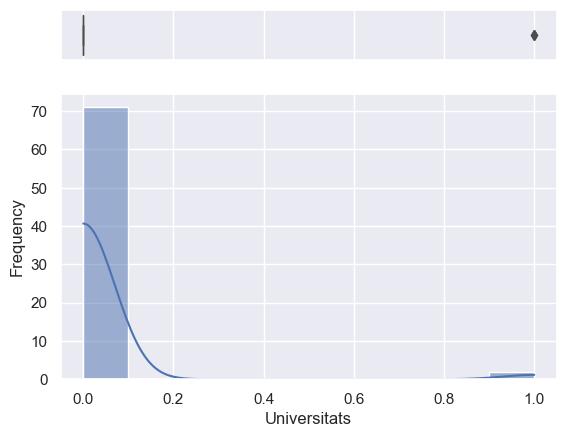

<Figure size 800x500 with 0 Axes>

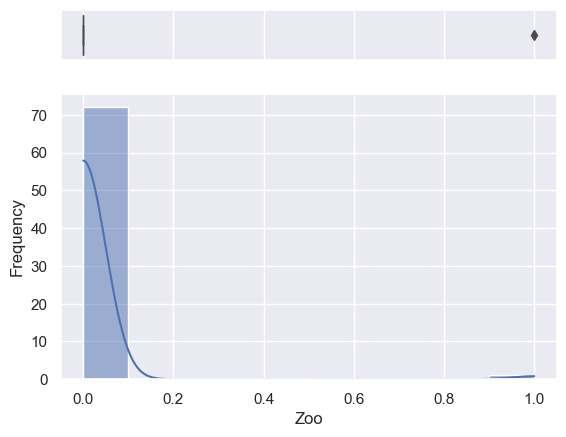

<Figure size 800x500 with 0 Axes>

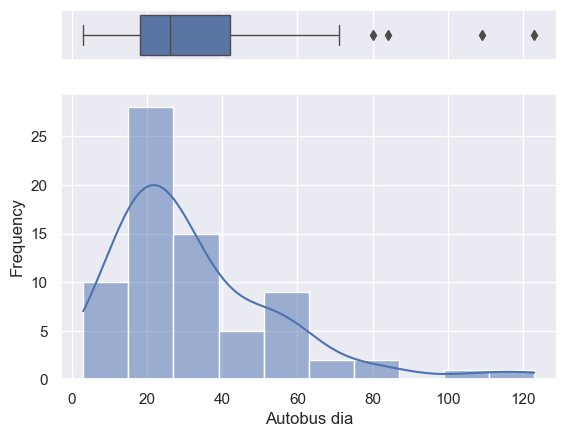

<Figure size 800x500 with 0 Axes>

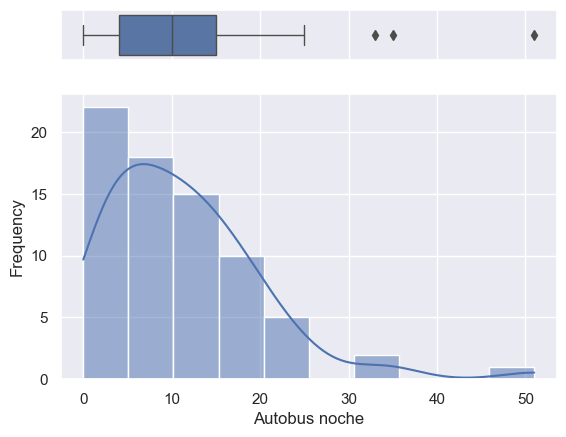

<Figure size 800x500 with 0 Axes>

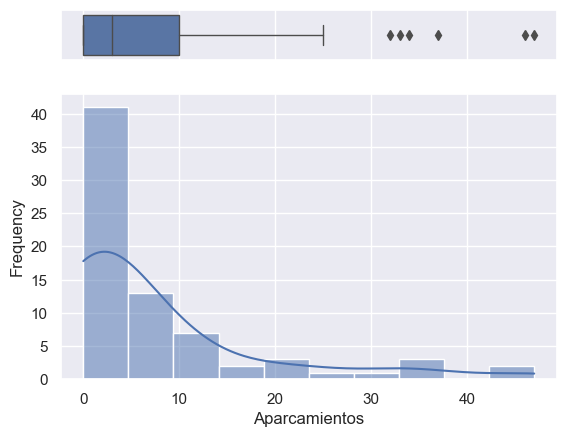

<Figure size 800x500 with 0 Axes>

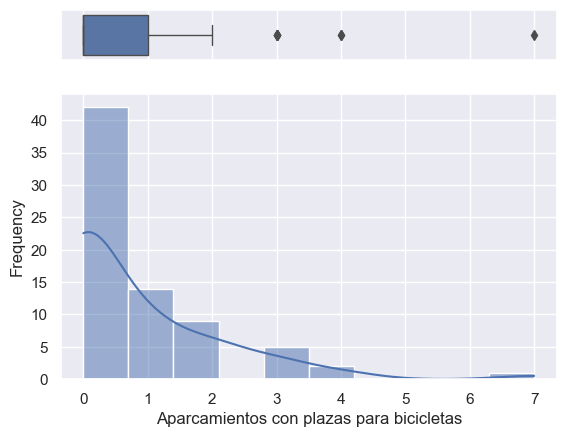

<Figure size 800x500 with 0 Axes>

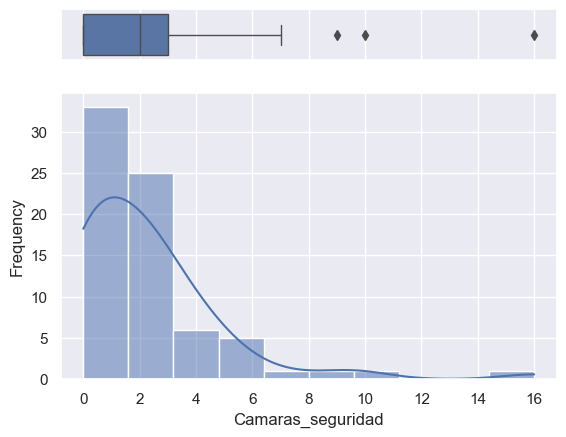

<Figure size 800x500 with 0 Axes>

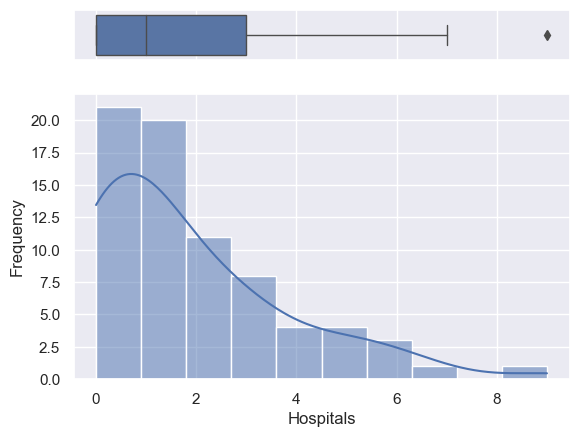

<Figure size 800x500 with 0 Axes>

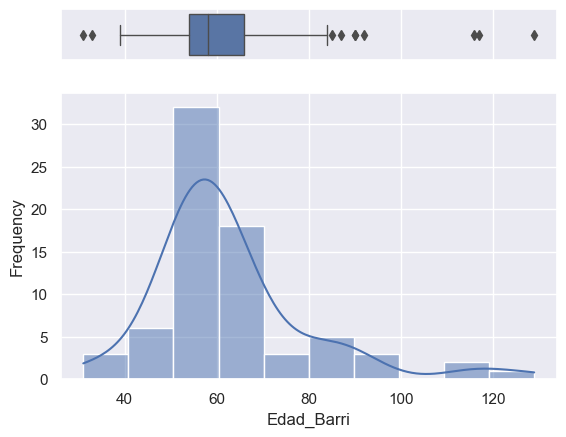

In [497]:
columns= X.columns

for i in columns:
    plt.figure(figsize=(8, 5))
    sns.set()
    
    # Filtra los valores no nulos en la columna actual
    filtered_data = X[X[i].notna()]
    
    # Crea un subplot con dos áreas (boxplot y histograma)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    
    # Dibuja el boxplot en la parte superior en posición horizontal
    sns.boxplot(x=filtered_data[i], orient="h", ax=ax_box, linewidth=1.0)
    
    # Dibuja el histograma en la parte inferior
    sns.histplot(filtered_data[i], ax=ax_hist, bins=10, kde=True)
    
    # Añade títulos a los subplots
    ax_box.set(xlabel='')
    ax_hist.set(xlabel=i)
    
    plt.gca().set(xlabel= i,ylabel='Frequency')
    plt.savefig('Boxplot e histogramas.png')

Segun la prueba de normalidad de shapiro, las varianbles no son normales, por tanto vemos con boxplot si hay o no outliers y como resultado es que todas las variables tienen outliers.

'Centres cívics', 'Installacions esportives', "Interiors d'illa", 'Museos','Ocio nocturno', 'Parcs i jardins', 'Restaurants', 'Universitats', 'Zoo', 'Autobus dia', 'Autobus noche', 'Estaciones de autobus', 'Alquiler de vehiculos', 'Aparcamientos', 'Aparcamientos con plazas para bicicletas', 'Gasolineras', 'Puntos de recarga electrica', 'Camaras_seguridad', 'CAPs', 'CUAPs', 'Hospitals', 'Edad_Barri', significa que todas las variables tienen datos extremos.

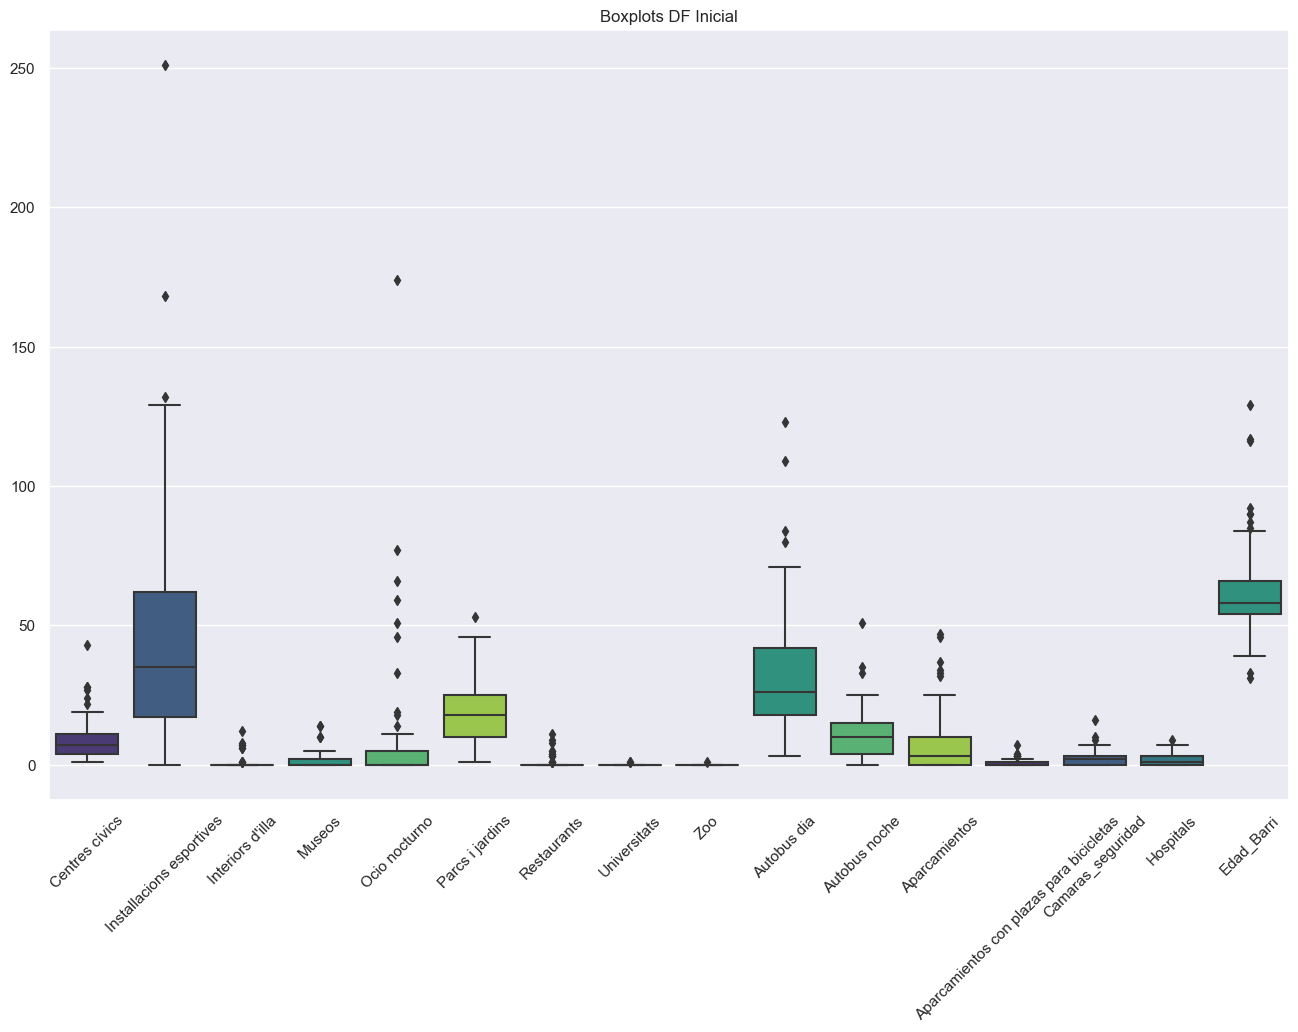

In [498]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=X, palette=sns.color_palette("viridis"))
plt.title('Boxplots DF Inicial')
plt.xticks(rotation=45)
plt.savefig('sin normalizar.png')
plt.show()

En este grafico Boxplot consolidamos todas las variables para tener una idea general del comportamiento de las variables al no ser normales y tener datos expremos. podemos ver variabilidad en el rango intercuartilico, la mediana y los datos atipicos.

## Transformaciones

In [499]:
columnas_escalarr=['Centres cívics', 'Installacions esportives', "Interiors d'illa", 'Museos','Ocio nocturno', 'Parcs i jardins', 'Restaurants', 'Universitats', 'Zoo', 'Autobus dia', 'Autobus noche', 'Aparcamientos', 'Aparcamientos con plazas para bicicletas', 'Camaras_seguridad', 'Hospitals', 'Edad_Barri']
scaler = RobustScaler()
X[columnas_escalarr] = scaler.fit_transform(X[columnas_escalarr])

Cuando normalizamos con la tecnica de escalado RobusScaler, el objetivo es escalar las variables al rededor de cero y que tengan una varianza comparable, pero con robustes ante los valores atipicos. ahora vemos que todos las variables tienen una mediana igual a 0 y un rango intercuartilico cercano a 1.

In [500]:
X

Centres cívics  Installacions esportives  Interiors d'illa  Museos  \
0         5.142857                  0.600000               1.0     2.5   
1         2.428571                  0.177778               0.0     7.0   
2         1.428571                  1.333333               0.0     0.5   
3         3.000000                 -0.777778               0.0     5.0   
4         1.000000                  1.800000               6.0     1.0   
..             ...                       ...               ...     ...   
68       -0.571429                  0.088889               0.0     0.0   
69        0.285714                 -0.111111               0.0     1.0   
70       -0.571429                 -0.444444               0.0     1.0   
71        0.571429                  0.733333               0.0     0.0   
72        0.285714                  0.600000               0.0     0.0   

    Ocio nocturno  Parcs i jardins  Restaurants  Universitats  Zoo  \
0            11.8         0.466667          4.0           0.0  0.0   
1             9.2        -0.266667          5.0           0.0  0.0   
2             3.6        -0.533333          8.0           0.0  0.0   
3            34.8         1.333333          5.0           0.0  1.0   
4             0.8         0.666667          3.0           0.0  0.0   
..            ...              ...          ...           ...  ...   
68            0.0         0.866667          0.0           0.0  0.0   
69            0.0         1.600000          0.0           0.0  0.0   
70            0.0         0.533333          0.0           0.0  0.0   
71            0.0         0.600000          0.0           0.0  0.0   
72            0.0         1.866667          0.0           0.0  0.0   

    Autobus dia  Autobus noche  Aparcamientos  \
0      0.250000       0.090909            2.2   
1     -0.166667       0.545455            1.3   
2      0.291667       0.454545            0.4   
3     -0.041667       0.545455            0.8   
4     -0.208333       0.727273            1.7   
..          ...            ...            ...   
68     0.000000       0.727273           -0.1   
69     0.083333       0.363636           -0.3   
70    -0.041667       0.727273           -0.2   
71    -0.500000      -0.090909           -0.3   
72     0.125000      -0.181818           -0.1   

    Aparcamientos con plazas para bicicletas  Camaras_seguridad  Hospitals  \
0                                        4.0           0.000000   0.666667   
1                                        1.0           0.333333   0.000000   
2                                        4.0           0.666667   0.666667   
3                                        3.0           0.000000   0.000000   
4                                        2.0           0.333333   0.666667   
..                                       ...                ...        ...   
68                                       2.0           2.666667   0.000000   
69                                       0.0           0.333333   0.333333   
70                                       0.0           1.000000   0.000000   
71                                       0.0          -0.333333   0.333333   
72                                       0.0          -0.666667   0.000000   

    Edad_Barri  
0     4.916667  
1     5.916667  
2     2.666667  
3     4.833333  
4     0.750000  
..         ...  
68   -2.250000  
69   -0.583333  
70   -0.750000  
71    0.000000  
72   -0.500000  

[73 rows x 16 columns]

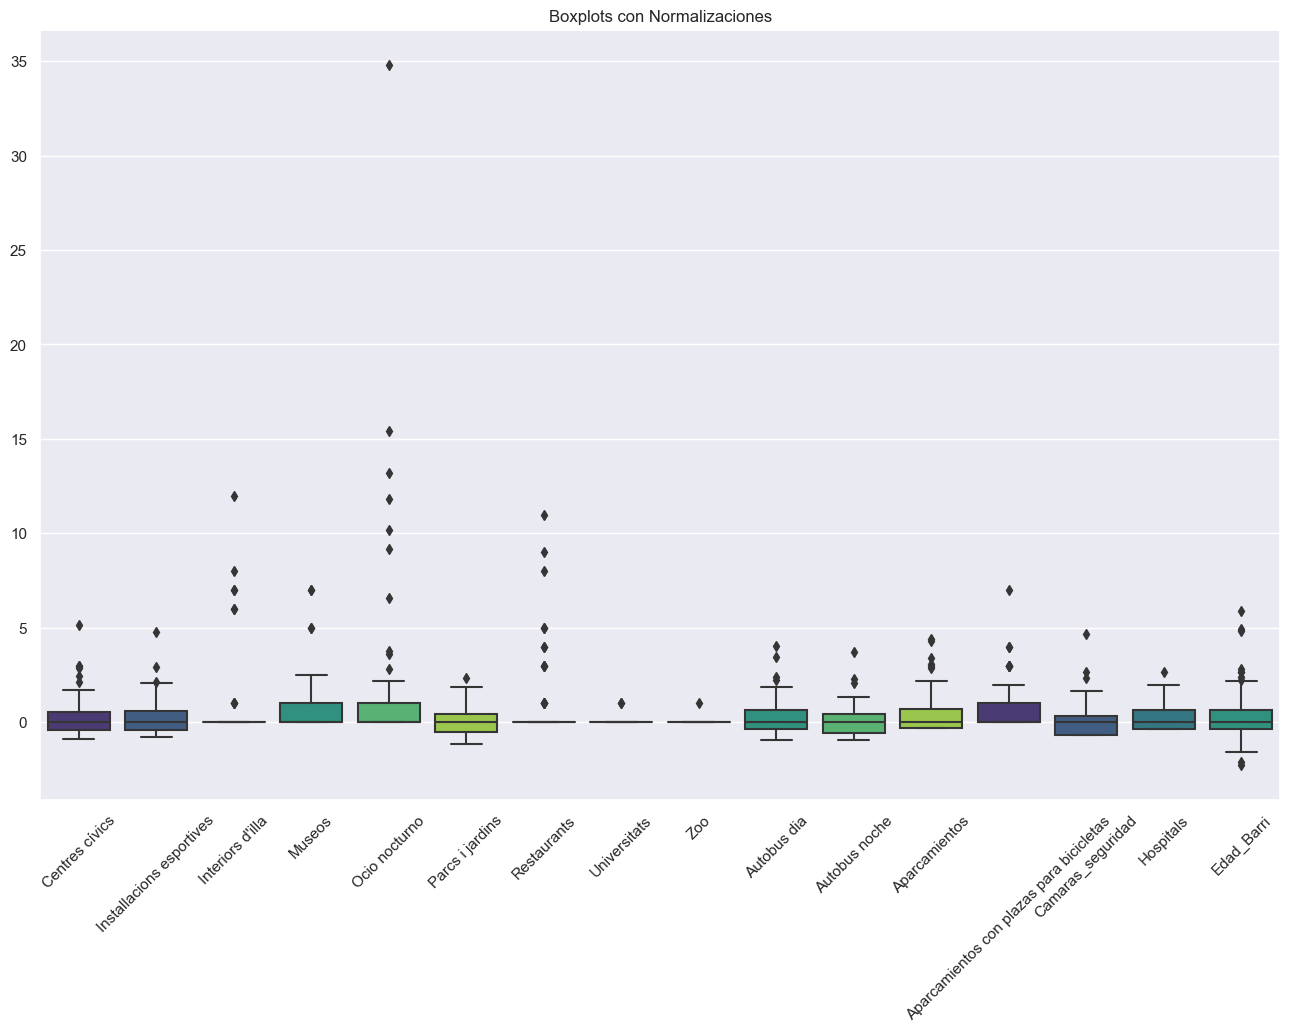

In [501]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=X, palette=sns.color_palette("viridis"))
plt.title('Boxplots con Normalizaciones')
plt.xticks(rotation=45)
plt.savefig('normalizados.png')
plt.show()

Observamos de forma general que las variables fueron escaladas para que tengan una mediana igual a cero, asi todas las variables pueden ser comparables. 

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### MODELOS

In [503]:
dtc = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(random_state=42)
lr = LinearRegression()
lss = Lasso()

¿ Por que se escogieron ?

dtc = DecisionTreeRegressor(random_state=42): Se escogio por que es uno de los modelos mas usados por su facilidad al interpretarse y visualizarse. no requiere normalizacion, ni asumen relaciones lineales y tiene parametros que me permiten ajustar su complejidad y evitar el sobreajuste. se ha usado el (random_state=42), para controlar las aleatoriedades de los datos y la reproducibilidad.

rfr = RandomForestRegressor(n_estimators=100, random_state=42): Este modelo es útil para problemas de regresión, donde se busca predecir valores numéricos a partir de variables predictoras. (n_estimators=100), Este parámetro especifica el número de árboles en el bosque aleatorio. En este caso, se ha establecido en 100. Aumentar el número de árboles generalmente mejora la robustez y el rendimiento del modelo, pero también puede aumentar el tiempo de entrenamiento. (random_state=42), lo utilizo para controlar la aleatoriedad y la reproductibilidad de los datos.

lr = LinearRegression(): este modelo aborda, regresión lineal desde un enfoque estadístico que modela la relación lineal entre una variable dependiente (o respuesta) y una o más variables independientes (o características).

In [504]:
models = [dtc, rfr, lr, lss]

In [505]:
predictions = {}

# Entrenar y predecir con cada modelo
for model in models:
    model_name = type(model).__name__
    model.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = model.predict(X_test)  # Realizar predicciones
    predictions[model_name] = y_pred  # Almacenar predicciones en el diccionario

# Crear un DataFrame con las predicciones
df_predictions = pd.DataFrame(predictions)

Con un ciclo for hacemos predicciones para cada modelo de los tres escogidos.

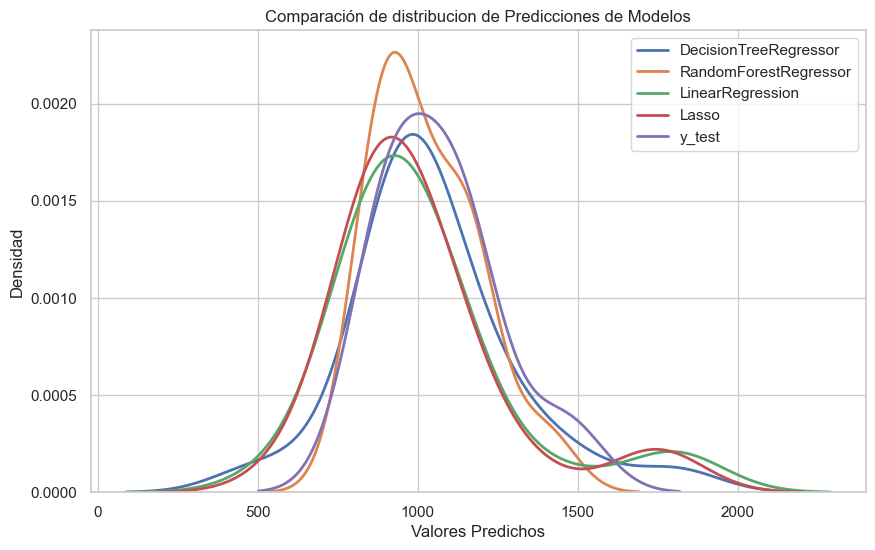

In [506]:
df_predictions['y_test'] = y_test
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for model_name in df_predictions.columns:
    sns.kdeplot(df_predictions[model_name], label=model_name, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de distribucion de Predicciones de Modelos')
plt.legend()
plt.savefig('comparacion_predicciones1.png')
plt.show()

En esta grafica podemos comparar los tres modelos para observar la distribución de su predicción, respecto al y_test, en lila, vemos como en la cumbre de la campana, DecisionTreeRegressor (azul), es aparentemente el mas cercano y de comportamiento similar aunque con variaciones. luego el modelo Lasso (rojo), es el siguiente mas cercano en cuanto a la cumbre de la campana, aunque en el comportamiento general de la prediccion tiene variaciones mayores al anterior. luego el Linear regresor (verde), trata de hacer la misma forma, pero no logra un pico similar a y_test, y es menos exacto que los dos modelos anteriores, el RandomForestRegressor (Naranja) varia mucho mas la forma respecto a los demas.

In [507]:
df_predict=df_predictions.drop('y_test',axis=1)

In [567]:
output1 = [] # Almacena los resultados
for model_name, y_pred in df_predict.items(): # Recorre los modelos y sus predicciones
    mse = mean_squared_error(y_test, y_pred) # Calcula MSE
    r2 = r2_score(y_test, y_pred) # Calcula R^2
    mae = mean_absolute_error(y_test, y_pred) # Calcula MAE
    output1.append({
        'Model': model_name, 
        'MSE': mse, 
        'MAE': mae,
        'R^2': r2
    }) 
output_df1 = pd.DataFrame(output1) # Crea dataframe con los resultados
output_df1.to_csv('metricas_modelos_estandar.csv', index=False)
print(output_df1)

                   Model           MSE         MAE       R^2
0  DecisionTreeRegressor  50110.000425  167.367000 -0.722078
1  RandomForestRegressor  22095.800994  106.265704  0.240657
2       LinearRegression  71201.285015  177.934235 -1.446900
3                  Lasso  64000.989087  175.215326 -1.199455


##### Comparacion de metricas de modelos estandar:
MSE(Mean Squared Error): En general esta metrica es muy mala para todos mis modelos, El modelo con mas ajuste (Las predicciones estan mas cerca de valores reales o sea a 0 ), a los datos (promedio de errrores al cuadrado), es: RandomForestRegressor con 22.095, luego el DecisionTreeRegressor con 50.110, luego Lasso con 64.000 y por ultimo LinearRegression 71.201.

MAE: tambien quise, aplicar esta metrica a mis modelos por que es mas robusta que el MSE, viendo que se tuvo muy malps puntajes, sin embargo aunque mejora las puntuaciones respecto al MSE,  siguen siendo malos puntajes: RandomForestRegressor con 106, luego el DecisionTreeRegressor con 167, luego Lasso con 175 y por ultimo LinearRegression 177.

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor con 0.24, luego el DecisionTreeRegressor con -0.72, luego Lasso con -1.19 y por ultimo LinearRegression -1.44.

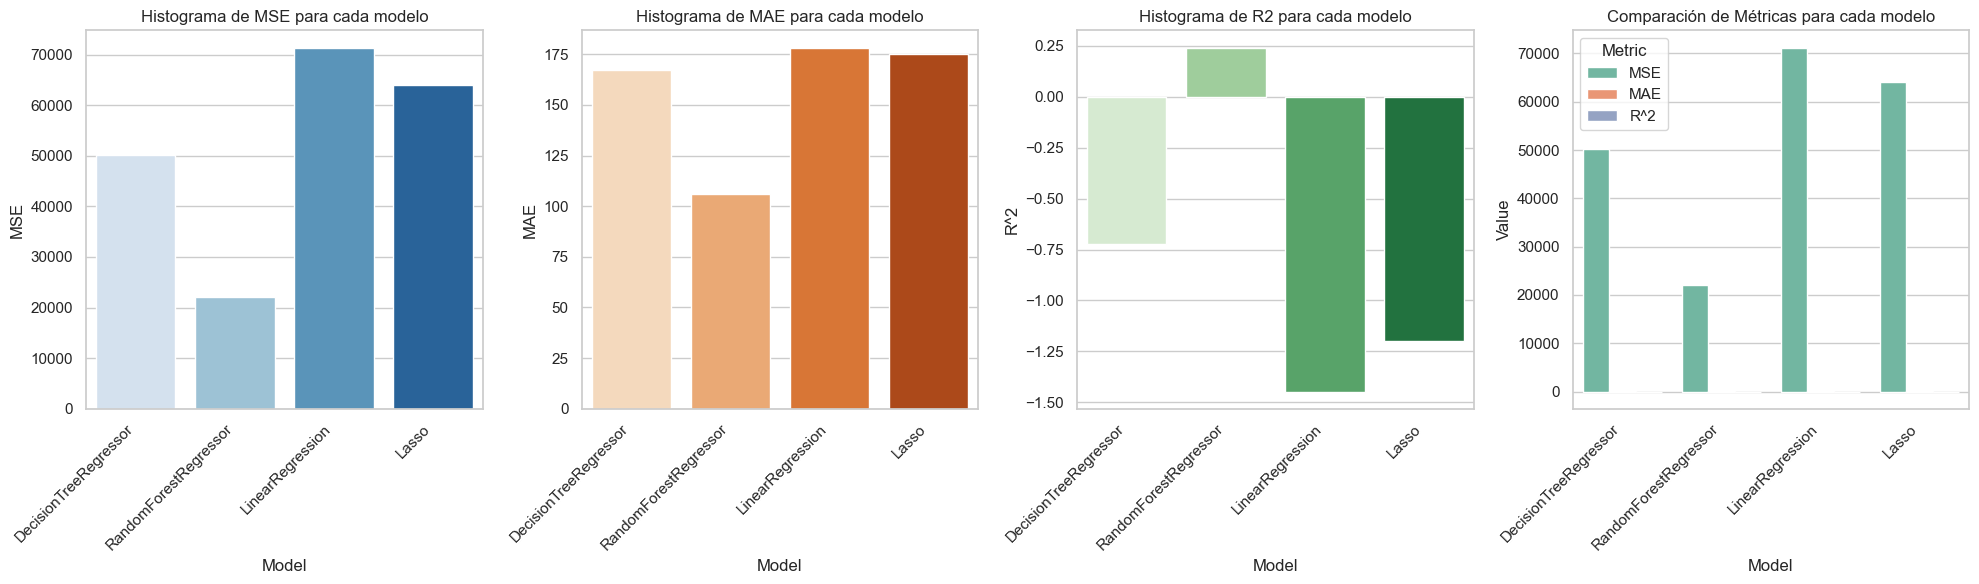

In [575]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Gráfico para MSE
sns.barplot(x='Model', y='MSE', data=output_df1, palette="Blues", ax=axes[0])
axes[0].set_title('Histograma de MSE para cada modelo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para MAE
sns.barplot(x='Model', y='MAE', data=output_df1, palette="Oranges", ax=axes[1])
axes[1].set_title('Histograma de MAE para cada modelo')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para R^2
sns.barplot(x='Model', y='R^2', data=output_df1, palette="Greens", ax=axes[2])
axes[2].set_title('Histograma de R2 para cada modelo')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Añadimos un gráfico adicional para comparación de métricas
metrics_df = pd.melt(output_df1, id_vars='Model', var_name='Metric', value_name='Value')
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df, palette="Set2", ax=axes[3])
axes[3].set_title('Comparación de Métricas para cada modelo')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

plt.tight_layout()
plt.savefig('comparacion inicial de modelos y sus metricas.png')
plt.show()

Podemos ver el comportamiento de las metricas para las modelos graficamente, vemos que sus puntajes son muy elevados y por tanto muy malos para todos los modelos. 

#### HIPER-PARAMETROS

In [520]:
dtc2 = DecisionTreeRegressor(random_state=42)
rfr2 = RandomForestRegressor(random_state=42)
lr2 = LinearRegression()
lss2 = Lasso()

In [521]:
dtc2.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [524]:
parametros_decision_tree = {
    'ccp_alpha': [0.0, 0.01],
    'criterion': ['absolute_error', 'squared_error'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10],
    'max_leaf_nodes': [None, 10, 50],
    'min_impurity_decrease': [0.0, 0.01],
    'max_features': ['sqrt', 10],
    'min_samples_leaf': [1, 5],
    'min_weight_fraction_leaf': [0.0, 0.01],
    'min_samples_split': [2, 10],
}

grid_search_dt = GridSearchCV(estimator=dtc2, param_grid=parametros_decision_tree, cv=5, scoring='r2', error_score='raise')
grid_search_dt.fit(X_train, y_train)
best_dt_model = grid_search_dt.best_estimator_
print(f'Best r2-score: {grid_search_dt.best_score_:.3f}\n')
print("Mejores parámetros para DecisionTreeRegressor:", grid_search_dt.best_params_)

Best r2-score: 0.293

Mejores parámetros para DecisionTreeRegressor: {'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': None, 'max_features': 10, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}


Los parametros que mejoraron respecto al por defecto fueron: 
- 'criterion': 'absolute_error'
- 'max_features': 10
- 'max_leaf_nodes': 10
- 'min_samples_split': 10
-'splitter': 'random'

se mejoraron 5 hiperparametros de 10. 

In [525]:
rfr2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [533]:
parametros_random_forest = {
    'max_depth': [None, 10],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5],
    'n_estimators': [50, 100],
    'oob_score': [True, False],
}
grid_search_rf = GridSearchCV(estimator=rfr2, param_grid=parametros_random_forest, cv=5, scoring='r2', error_score='raise')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_
print(f'Best r2-score: {grid_search_rf.best_score_:.3f}\n')
print("Mejores parámetros para RandomForestRegressor:", grid_search_rf.best_params_)

Best r2-score: 0.287

Mejores parámetros para RandomForestRegressor: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'oob_score': True}


Los parametros que mejoraron respecto al por defecto fueron:

- 'max_depth': 10
- 'max_features': 'sqrt'
- 'oob_score': True.

In [534]:
lr2.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [536]:
parametros_lg = {
    "fit_intercept":[True,False,], 'positive':[False,True], "copy_X":[True, False], "n_jobs":[0.5,1,2,4,7,9, None]
}
grid_search_lg = GridSearchCV(estimator=lr2, param_grid=parametros_lg, cv=5, scoring='r2')
grid_search_lg.fit(X_train, y_train)
best_lg_model = grid_search_lg.best_estimator_
print(f'Best r2-score: {grid_search_lg.best_score_:.3f}\n')
print("Mejores parámetros para Linear Regressor:", grid_search_lg.best_params_)

Best r2-score: 0.132

Mejores parámetros para Linear Regressor: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': True}


C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 642, in fit
    self._validate_params()
  File "C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_params
    validate_parameter_con

Los parametros que mejoraron respecto al por defecto fueron:

- 'n_jobs': 1, 
- 'positive': True

In [537]:
lss2.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [547]:
parametros_Lasso = {
    'alpha': [1.0, 2.0, 3.0, 4.0,10],
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'max_iter': [1000],
    'positive': [True, False],
    'precompute': [True, False],
    'random_state': [None],
    'selection': ['cyclic'],
    'tol': [0.0001, 0.0002],
    'warm_start':[ False],
}
grid_search_lss2 = GridSearchCV(estimator=lss2, param_grid=parametros_Lasso, cv=5, scoring='r2', error_score='raise')
grid_search_lss2.fit(X_train, y_train)
best_lss2_model = grid_search_lss2.best_estimator_
print(f'Best r2-score: {grid_search_lss2.best_score_:.3f}\n')
print("Mejores parámetros para RandomForestRegressor:", grid_search_lss2.best_params_)

C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445793.5975777954, tolerance: 4605.9743604525
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 445793.5975777954, tolerance: 9211.948720905
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\dpino\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.458e+05, tolerance: 4.606e+03
  model = cd_fast.enet_coordinate_descent(
C:\User

Best r2-score: 0.159

Mejores parámetros para RandomForestRegressor: {'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': True, 'precompute': True, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}


Los parametros que mejoraron respecto al por defecto fueron:

- 'alpha': 10
- 'positive': True
- 'precompute': True

In [549]:
best_models = [('DecisionTreeRegressor', best_dt_model),
               ('RandomForestRegressor', best_rf_model),
               ('LinearRegression', best_lg_model),
               ('Lasso()', best_lss2_model)]

In [550]:
predictions2 = {}
for model in best_models:
    y_pred = model[1].predict(X_test)
    predictions2[model[0]] = y_pred
df_predictions2 = pd.DataFrame(predictions2)

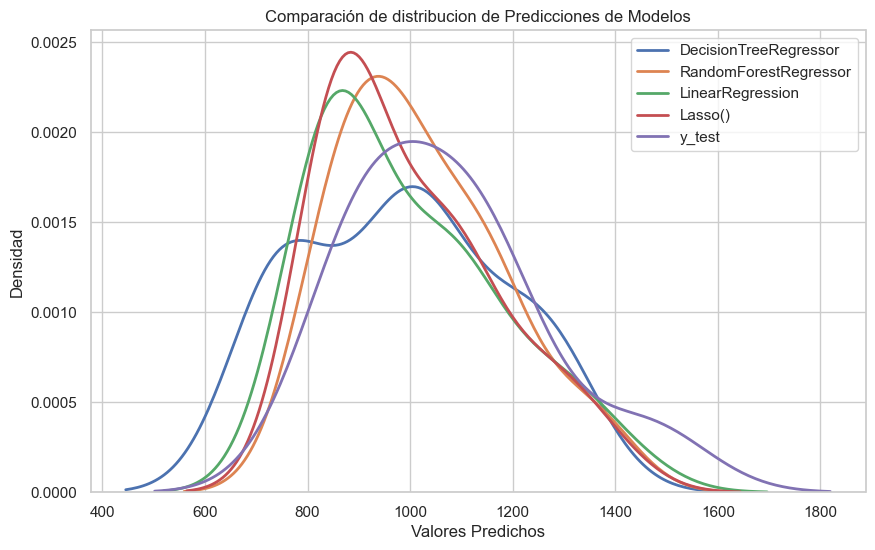

In [551]:
df_predictions2['y_test'] = y_test
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
for model_name in df_predictions2.columns:
    sns.kdeplot(df_predictions2[model_name], label=model_name, linewidth=2)
plt.xlabel('Valores Predichos')
plt.ylabel('Densidad')
plt.title('Comparación de distribucion de Predicciones de Modelos')
plt.legend()
plt.savefig('comparacion_predicciones2.png')
plt.show()

En esta grafica kde, podemos ver que los modelos cambiaron su forma respecto al anterior, respecto al y_test, en lila, vemos como en la cumbre de la campana, DecisionTreeRegressor (azul), es aparentemente el mas cercano y de comportamiento similar aunque con variaciones entre el rango 800 y 1000. luego el modelo  el RandomForestRegressor (Naranja) tiene un comportamiento mas normnal pero su pico se aleja un poco respecto al y_test. luego el Linear regresor (verde), trata de hacer la misma forma, pero no logra un pico similar a y_test,  Lasso (rojo), es el que mas se aleja en el comportamiento de su prediccion. 

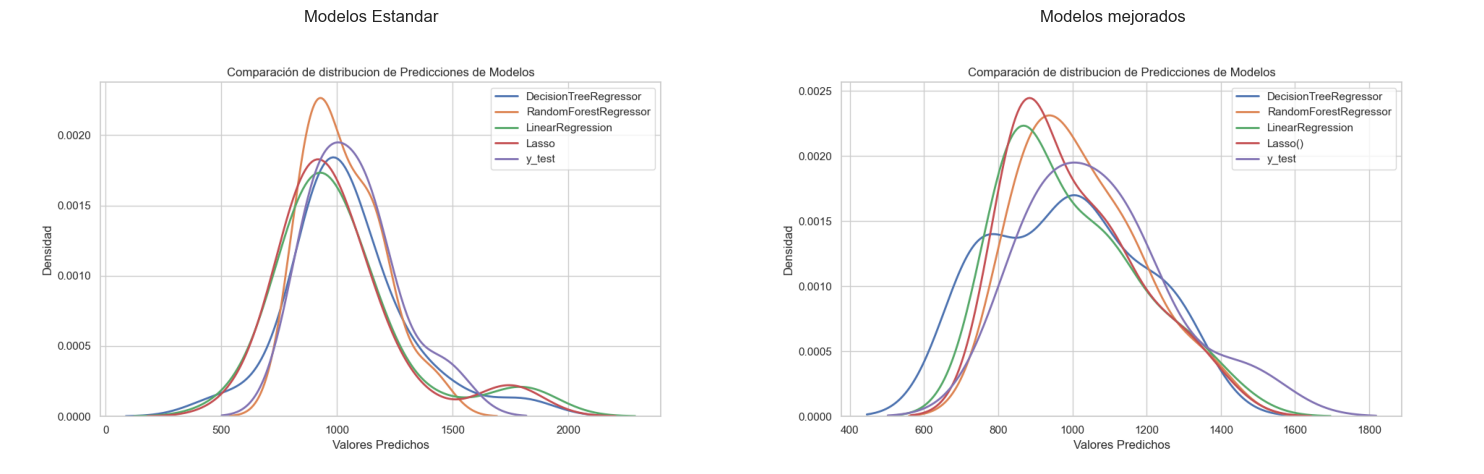

In [554]:
imagen1 = mpimg.imread('comparacion_predicciones1.png')
imagen2 = mpimg.imread('comparacion_predicciones2.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

En la comparativa de las graficas KDE, podemos observar el comportamiento de los modelos antes y despues de mejorar sus hiperparametros, el modelo DecisionTreeRegressor (azul), sigue teniendo el comportamiento mas cercano al y_testaunque con algunas variaciones, El RandomForestRegressor (Naranja), ha mejorado su comportamiento respecto al y_test, frente al anterior, el Linear regresor (verde), empeoro su comportamiento y el  Lasso (rojo) tambien empeoro, vemos que los modelos de arboles de decision mejoraron su comportamiento, mientras que los demas modelos lo empeoraron con la mejora de hiperparametros. 

In [557]:
df_predict22=df_predictions2.drop('y_test',axis=1)

In [562]:
output2 = [] # Almacena los resultados actualizados
for model_name, y_pred in df_predict22.items(): # Recorre los modelos y sus predicciones
    mse = mean_squared_error(y_test, y_pred) # Calcula MSE
    r2 = r2_score(y_test, y_pred) # Calcula R^2
    mae = mean_absolute_error(y_test, y_pred) # Calcula MAE
    output2.append({
        'Model': model_name, 
        'MSE': mse, 
        'MAE': mae,
        'R^2': r2
    }) 
output_df2 = pd.DataFrame(output2) # Crea dataframe con los resultados actualizados
output_df2.to_csv('metricas_modelos_actualizadas.csv', index=False) # Guarda el DataFrame en un archivo CSV con un nombre diferente
print(output_df2) # Muestra las métricas actualizadas

                   Model           MSE         MAE       R^2
0  DecisionTreeRegressor  29890.626775  143.049000 -0.027220
1  RandomForestRegressor  19343.705178  104.241062  0.335235
2       LinearRegression  24235.657707  122.317616  0.167119
3                Lasso()  22479.374176  117.318575  0.227475


#### Comparacion de metricas de modelos estandar:
MSE(Mean Squared Error): En general esta metrica es muy mala para todos mis modelos, El modelo con mas ajuste (Las predicciones estan mas cerca de valores reales o sea a 0 ), a los datos (promedio de errrores al cuadrado), es: RandomForestRegressor con 19.343, luego el DecisionTreeRegressor con 29.890, luego Lasso con 22.479 y por ultimo LinearRegression 24.235.

MAE (Error Absoluto Medio): un valor más cercano a 0 indica un mejor rendimiento del modelo. El MAE representa la magnitud promedio de los errores en las predicciones del modelo, y queremos minimizar este error para obtener predicciones más precisas. tambien quise, aplicar esta metrica a mis modelos por que es mas robusta que el MSE, viendo que se tuvo muy malps puntajes, sin embargo aunque mejora las puntuaciones respecto al MSE, siguen siendo malos puntajes: RandomForestRegressor con 104, luego Lasso con 117, luego el DecisionTreeRegressor con 143,  y por ultimo LinearRegression 122.

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 tiene un rango entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor con 0.33, luego el DecisionTreeRegressor con 0.27, luego Lasso con 0.22 y por ultimo LinearRegression 0.16.

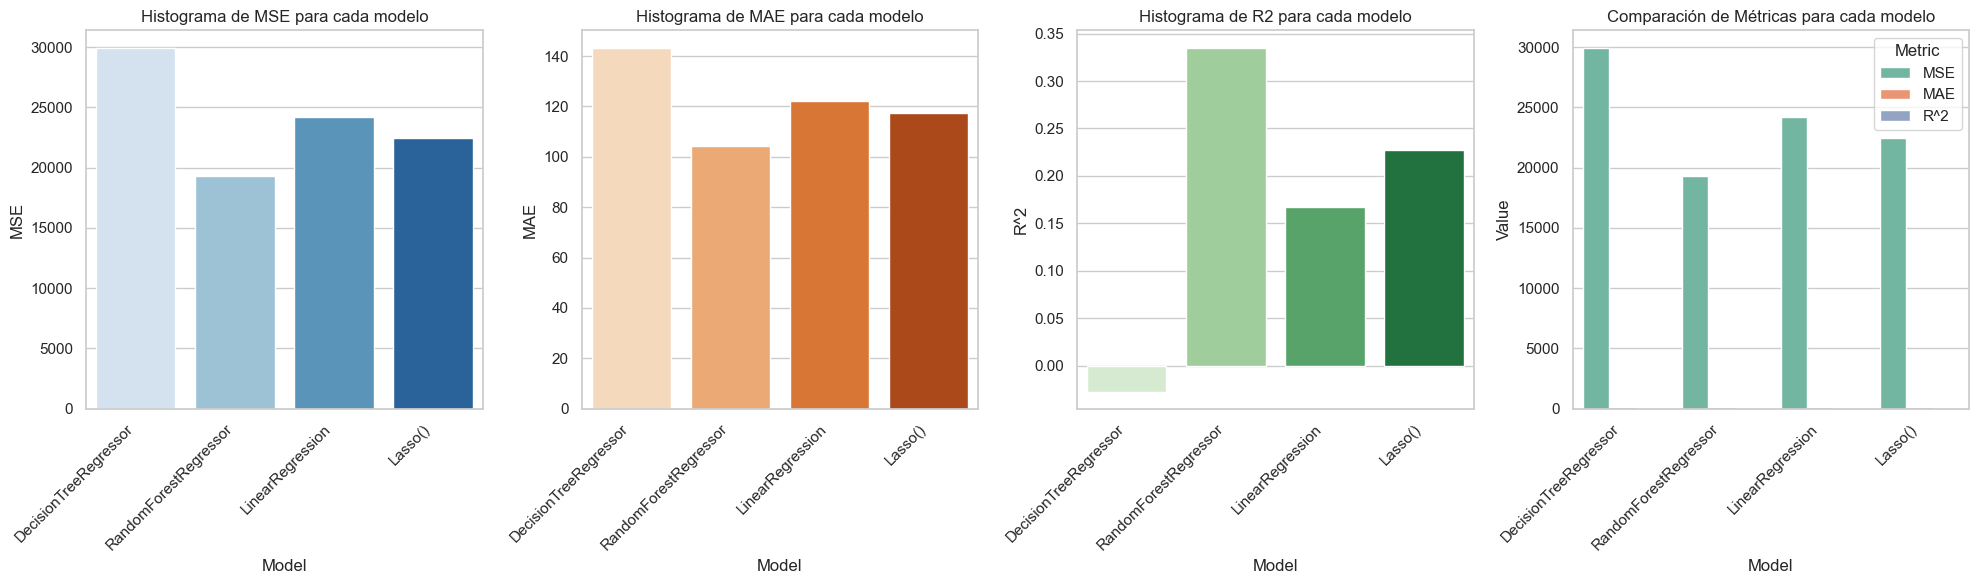

In [564]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 6))

# Gráfico para MSE
sns.barplot(x='Model', y='MSE', data=output_df2, palette="Blues", ax=axes[0])
axes[0].set_title('Histograma de MSE para cada modelo')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para MAE
sns.barplot(x='Model', y='MAE', data=output_df2, palette="Oranges", ax=axes[1])
axes[1].set_title('Histograma de MAE para cada modelo')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Gráfico para R^2
sns.barplot(x='Model', y='R^2', data=output_df2, palette="Greens", ax=axes[2])
axes[2].set_title('Histograma de R2 para cada modelo')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

# Añadimos un gráfico adicional para comparación de métricas
metrics_df = pd.melt(output_df2, id_vars='Model', var_name='Metric', value_name='Value')
sns.barplot(x='Model', y='Value', hue='Metric', data=metrics_df, palette="Set2", ax=axes[3])
axes[3].set_title('Comparación de Métricas para cada modelo')
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=45, ha='right') # Girar los nombres 45 grados

plt.tight_layout()
plt.savefig('comparación de modelos y sus metricas mejoradas.png')
plt.show()

en la comparativa de modelos vemos que el RandomForestRegressor parece ser el mejor modelo de los 4, sin embargo las metricas son malas

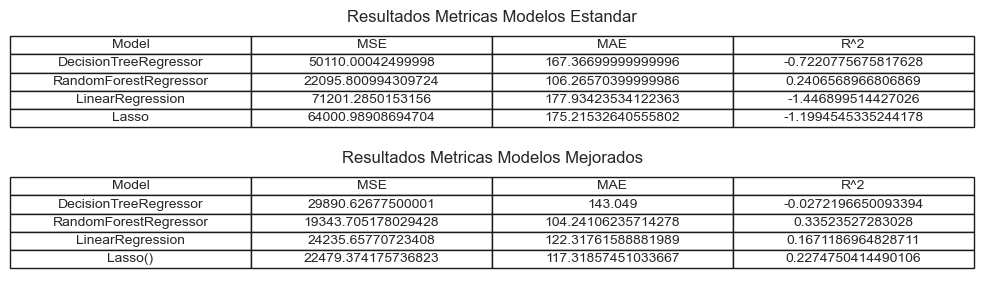

In [572]:
resultados1 = pd.read_csv('metricas_modelos_estandar.csv')
resultados2 = pd.read_csv('metricas_modelos_actualizadas.csv')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 3))  # 2 filas, 1 columnas
plt.subplots_adjust(top=0.8)
# Mostrar la tabla 1 en el primer subplot
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].table(cellText=resultados1.values,
             colLabels=resultados1.columns,
             cellLoc='center',
             loc='center')
axs[0].set_title('Resultados Metricas Modelos Estandar')

# Mostrar la tabla 2 en el segundo subplot
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].table(cellText=resultados2.values,
             colLabels=resultados2.columns,
             cellLoc='center',
             loc='center')
axs[1].set_title('Resultados Metricas Modelos Mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

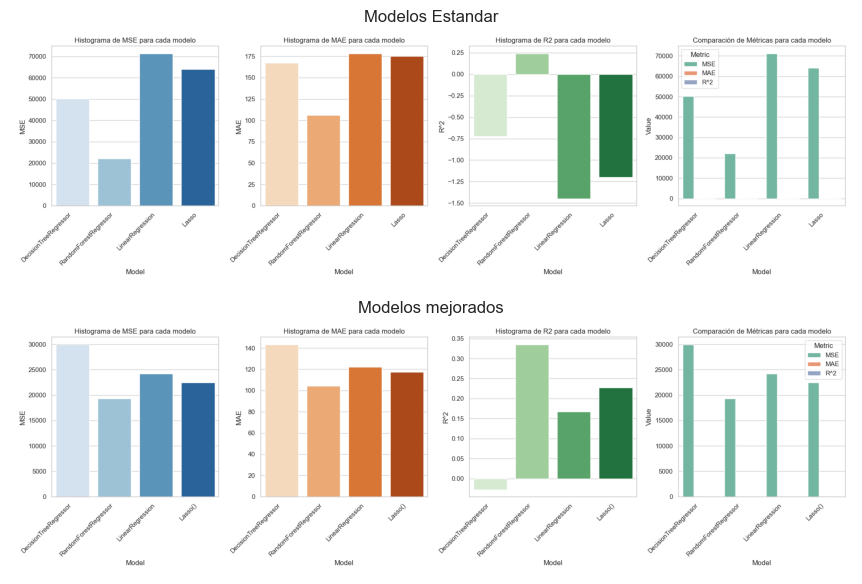

In [576]:
imagen1 = mpimg.imread('comparacion inicial de modelos y sus metricas.png')
imagen2 = mpimg.imread('comparación de modelos y sus metricas mejoradas.png')

# Configurar la figura y los subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 6))  # 1 fila, 2 columnas

# Mostrar la primera gráfica en el primer subplot
axs[0].imshow(imagen1)
axs[0].axis('off')  # Desactivar ejes si es necesario
axs[0].set_title('Modelos Estandar')

# Mostrar la segunda gráfica en el segundo subplot
axs[1].imshow(imagen2)
axs[1].axis('off')  # Desactivar ejes si es necesario
axs[1].set_title('Modelos mejorados')

# Ajustar el diseño para evitar solapamiento
plt.tight_layout()

# Mostrar la figura
plt.show()

In [580]:
cv_results = []
for model_name, model in best_models:
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model_name} - Mean Cross-Validation Score: {np.mean(scores)}")
    print(scores)
    cv_results.append(scores)

DecisionTreeRegressor - Mean Cross-Validation Score: -3.3904278030150197
[-3.61648544 -1.38187402 -2.4016411  -8.99309925 -0.55903921]
RandomForestRegressor - Mean Cross-Validation Score: -1.9348917036038285
[-0.05725061 -1.20219118 -1.67878935 -6.65510613 -0.08112124]
LinearRegression - Mean Cross-Validation Score: -1.9783774786758852
[-1.15323512 -0.86660268 -0.39518559 -7.57635599  0.09949198]
Lasso() - Mean Cross-Validation Score: -1.9478559494891852
[-0.2702305  -0.92072502 -0.26823705 -8.42553779  0.14545062]


In [581]:
model_names = []
mean_scores_list = []
std_dev_scores_list = []

cv_results = np.array(cv_results)
mean_scores = np.mean(cv_results, axis=1)
std_dev_scores = np.std(cv_results, axis=1)
for i, (model_name, _) in enumerate(best_models):
    model_names.append(model_name)
    mean_scores_list.append(mean_scores[i])
    std_dev_scores_list.append(std_dev_scores[i])
df_results = pd.DataFrame({
    'Model': model_names,
    'Mean Cross-Validation Score': mean_scores_list,
    'Standard Deviation': std_dev_scores_list
})
print(df_results)
df_results.to_csv('Cross validation modelos mejorados con hiperparametros.csv', index=False)

                   Model  Mean Cross-Validation Score  Standard Deviation
0  DecisionTreeRegressor                    -3.390428            2.982274
1  RandomForestRegressor                    -1.934892            2.443148
2       LinearRegression                    -1.978377            2.831194
3                Lasso()                    -1.947856            3.256773
